<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Book_Recommendation_ML/blob/main/Final_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Vivek Kumar Singh
##### **Team Member 2 -**   Pawan Kumar Singh
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

#Data Preprocessing
* The needed modules are imported and the datasets are loaded
* We view the first five rows of  dataset and their shape
* Get the info of datasets like the non null count in each column and the data type of each column
* The datasets are checked for presence of duplicate rows
* The columns of dataset are checked for missing or null values  which are found to be very minimal except the 'Age' column in 'users' dataset
* The datasets  are visualised for presence of null values
* We take a quick summary overview through few important statistics using describe function
*  Unique values of each variable of datasets are checked 
#Data wrangling
* Dataset is prepared for the use in recommendation system
* The Image Urls are removed from Dataset 'books'
*  The non integer values in Year-of-Publication column is  made zero and integer values are kept as it is and stored in a new column 'year'
* Country is extracted from 'Location' column
* Certain new Dataframes are created by applying joins for the purpose of performing EDA efficiently and easily.
* In books dataset same books appear multiple times with different publishers 
so we create a dataset where book apperars only once and not multiple times
* Dataframe of the top rated books with atleast more than fifty ratings by users who have rated atleast fifty books is created 
#Exploratory Data Analysis(EDA)
1. Distribution of ratings is visualised using countplot
2. Authors who have written maximum number of books in the dataset is visualized using barplot
3. Publishers who have published maximum books is visualised using barplot
4. Distribution of users by country is checked through barplot.
5. Distribution of sell of books from year 1970 onwards is visualised using countplot
6. Distribution plot of age of users is plotted.
7. Countplot of users according to their Age category is plotted.
8. The authors whose  maximum books have been sold out is visualised using barplot
9. The books most published by multiple publishers is visualised
10. Number of books rated and number of books not rated is visualised using piechart
11. Barplot showing books having best average rating with a minimum rating by ten users
12. Barplot showing books having worst average rating with a minimum rating by ten users
13. Books with maximum sell is visualised using barplot
14. Correlation plots to show correlation between numeric variables
15. Pairplot to show relation between every pair of numeric variables

#Hypothesis testing

1. The 'Age' of users are in Normal distribution or not.
2. The users' 'Age' and the 'Book-Rating' are dependent or independent sample
3.  The ratings on books given by users of USA and Canada are Identical or not



---
---


* For the purpose of recommendation we consider only books which have been rated atleast fifty times and the users who have rated atleast fifty books so we create a dataframe with users and books fullfilling these criterion.
* A pivot table is created with  row as 'ISBN' of books and columns as 'User-ID' and the values are the ratings given by the users to the books.
* A function is created to recommend books on the basis of a book name passed to it as parameter 
* A function is created to show distribution of actual and predicted ratings for any given model.
* A book recommmender function to predict books on the basis of the model used is created

Models Implemented:
We test the following three models-
1. Model KNN with means
2. Singular Value Decomposition or SVD Model
3. Negative Matrix Factorization or model NMF.

The model KNNWithMeans gives the best RMSE score and takes the least amount of fitting time among our models so we choose it as our model to be used







# **GitHub Link -**

https://github.com/vivek72v/Book_Recommendation_Sysytem

# **Problem Statement**


During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

**Surprise is a Python package for building and analyzing recommender systems that deal with explicit rating data.**

In [30]:
#Installing the surprise package needed for collaborative filtering
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from surprise import Dataset, Reader
from surprise import SVD, NMF, KNNWithMeans
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

### Dataset Loading

In [32]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
books = pd.read_csv('/content/drive/MyDrive/Final_Book_Recommendation_Systeam/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Final_Book_Recommendation_Systeam/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Final_Book_Recommendation_Systeam/Ratings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [33]:
# Dataset First Look
#Viewing book dataframe
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [34]:
#Viewing users dataframe
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [35]:
#Viewing book dataframe
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [36]:
# Dataset Rows & Columns count
#Rows & Columns count of dataframe books
books.shape

(271360, 8)

In [37]:
#Rows & Columns count of dataframe users
users.shape

(278858, 3)

In [38]:
#Rows & Columns count of dataframe ratings
ratings.shape

(1149780, 3)

### Dataset Information

In [39]:
# Dataset Info
#Getting informmation about datframe books
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [40]:
#Getting informmation about datframe users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [41]:
#Getting informmation about datframe ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [42]:
# Dataset Duplicate Value Count

In [43]:
#Counting Duplicate values in dataframe books
len(books[books.duplicated()])

0

In [44]:
#Counting Duplicate values in dataframe users 
len(users[users.duplicated()])

0

In [45]:
#Counting Duplicate values in dataframe ratings
len(ratings[ratings.duplicated()])

0

#### Missing Values/Null Values

In [46]:
# Missing Values/Null Values Count of dataframe books
print(books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [47]:
# Missing Values/Null Values Count of dataframe users
print(users.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [48]:
# Missing Values/Null Values Count of dataframe ratings
print(ratings.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

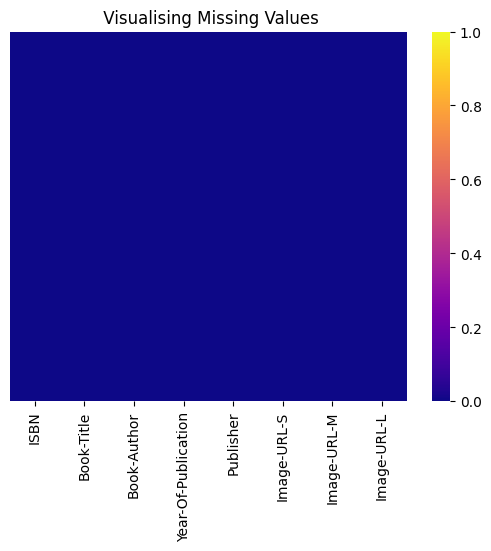

In [49]:
# Visualizing the missing values for books dataframe
sns.heatmap(books.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

Text(0.5, 1.0, ' Visualising Missing Values')

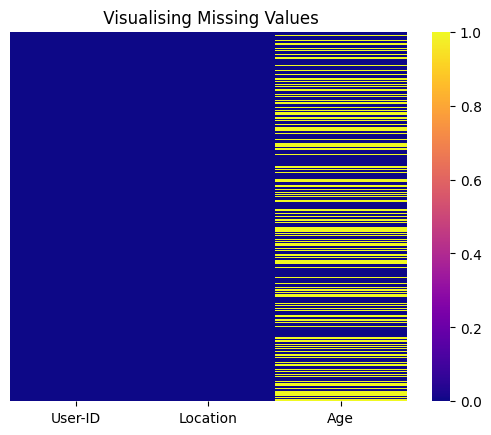

In [50]:
# Visualizing the missing values for users dataframe
sns.heatmap(users.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [51]:
#There  are many Null values in 'Age' column of users Dataframe , we replace those values by zeroes
users.Age.fillna(0, inplace = True)

Text(0.5, 1.0, ' Visualising Missing Values')

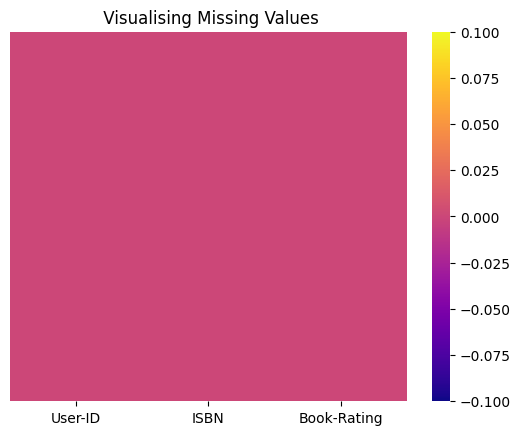

In [52]:
# Visualizing the missing values for ratings datframe
sns.heatmap(ratings.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

There are three datasets of name users , books and ratings
1. books dataset gives the informations about books like its ISBN number , name , author's name , year of publication and image-url link
2. users dataset gives information about users like 'User-ID','Location' , 'Age' of the users
3. ratings gives information like 'User-ID' , 'ISBN' and 'Book-Rating'
---
* The age columns in users dataset has many Null values which we have replaces by zero
* The three dataframes given when joined in different ways will give many hidden informations and insights
* The Higher ratings given by the users indicates user likes books thus rating will be the most important part in recommending the books

## ***2. Understanding Your Variables***

In [53]:
# Dataset Columns
#Viewing columns name of dataframe books
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [54]:
#Viewing columns name of dataframe users
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [55]:
#Viewing columns name of dataframe ratings
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [56]:
# Dataset book Describe
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [57]:
# Dataset users Describe
users.describe()

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,20.948214
std,80499.51502,20.362679
min,1.00000,0.000000
25%,69715.25000,0.000000
50%,139429.50000,22.000000
75%,209143.75000,35.000000
max,278858.00000,244.000000


In [58]:
# Dataset ratings Describe
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description 

Users variables 
* User-ID  : Unique Identification number of each user
* Location : Location details of each user
* Age      : Age of the user

Books Variables
* ISBN  : International Standard Book Number
* Book - Title : Name of the Book
* Book - Author : Book's Author Name
* Year-Of-Publication : Year Of the publication of the Book
* Publisher	: Name of the publisher of the Book
* Image-URL-S : Small size Image Url of the Book
* Image-URL-M : Medium size Image Url of the Book
* Image-URL-L : Large size Image Url of the Book

Ratings
* User-ID  : Unique Identification number of each user
* ISBN  : International Standard Book Number
* Book-Rating : rating given by the user to the book

### Check Unique Values for each variable.

In [59]:
# Check Unique Values for each variable of dataframe books
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [60]:
# Check Unique Values for each variable of dataframe users
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [61]:
# Check Unique Values for each variable of dataframe ratings
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Preparing Dataset for making Recommender System

In [62]:
#Keeping the ratings of the books which are in books dataset
ratings = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_original = ratings.copy()

In [63]:
#Keeping only the valid rating that is those higher then zero
ratings = ratings[ratings['Book-Rating'] != 0]

In [64]:
#Getting users with who have rated atleast 50 books
user_ratings_threshold = 50
filter_users = ratings['User-ID'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()
df_ratings_top = ratings[ratings['User-ID'].isin(filter_users_list)]

In [65]:
#Choosing the top ten percent most frequently rated books
book_ratings_threshold = len(df_ratings_top['ISBN'].unique())/10
filter_books_list = df_ratings_top['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]

In [66]:
#creating the dataset for collaborative filtering using surprise package
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader)

#### Dataframe Column Manipulation

In [67]:
#Removing the image-urls as they are not needed.
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]

In [68]:
# Write your code to make your dataset analysis ready.
#Converting column year-of-publication of dataframe books  to integer datatype from object datatype
books['year'] = books["Year-Of-Publication"].map(lambda x : x if type(x) ==int else 0)
#Dropping the column 'Year-of-Publication' from books dataframe
books.drop(columns = ["Year-Of-Publication"] , axis = 1 , inplace = True)

In [69]:
#Getting the country in a seperate column from location details given
users['Location'] = users['Location'].str.split(',')
users['country'] = users['Location'].apply(pd.Series)[2]

In [70]:
#Seperating users in different Age categories according to their given Age
users['Age category'] = users['Age'].map(lambda x : 'Age not Given' if x == 0  else('Child' if x<13 else('Teenager' if x <20 else('Young Adult' if x < 41 else('Middle Aged' if x <61 else 'Retired') ))))

#### For EDA

In [71]:
# Applying inner join on users and ratings dataframe using the column 'User-ID'
user_ratings = pd.merge(users,ratings, on= 'User-ID' , how  ='inner')

In [72]:
#Applying inner join on books and ratings dataframe using ISBN column 
book_ratings = pd.merge(books,ratings , on = 'ISBN' , how = 'inner')

In [73]:
#Getting a Dataset by merging all the three datasets books, users and ratings.
Final_Dataset=pd.merge(pd.merge(users,ratings,on='User-ID'),books,on = 'ISBN')

In [74]:
#In books dataset same books appear multiple times with different publishers 
#Creating a dataset where book appears only once and not multiple times
books_unique = books[['Book-Title','Book-Author']].drop_duplicates()

#### Top Rated Books

In [75]:
#Getting  the count of how many times a book has been rated
average_numbers_of_ratings = book_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
average_numbers_of_ratings.rename(columns = {'Book-Rating':'Number of Rating'} , inplace = True)
#Getting the average rating of each book
average_numbers_of_ratings['Average-Ratings'] = book_ratings.groupby('Book-Title').mean()['Book-Rating'].values

In [76]:
# The top rated books with atleast more than fifty ratings by users who have rated atleast fifty books
average_numbers_of_ratings= average_numbers_of_ratings[average_numbers_of_ratings['Number of Rating']>=50]
top_rated_books = average_numbers_of_ratings.sort_values(by = 'Average-Ratings' , ascending = False).head(10)
top_rated_books = books[books['Book-Title'].isin(top_rated_books['Book-Title'])].drop_duplicates('Book-Title')

### What all manipulations have you done and insights you found?

* We keep only those ratings which are non zero and are given to books present in books dataset
* Create a dataframe named Final_dataset by combining our all three datasets books, users and ratings
* For the purpose of collaborative filtering we select only those users who have rated atleast fifty books and as the dataset is too large we select only top ten percent of the most frequently rated books for recommenadtion.
* The image urls are dropped as we will not be using it
* Country of the users are extracted from there given Location details
* A column in dataframe in users dataframe is created categorising the Age groups according to age of users given
* Some Dataframes are created to perform certain EDA easily
* Dataframe of the top rated books with atleast more than fifty ratings by users who have rated atleast fifty books is created

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Book-Rating', ylabel='count'>

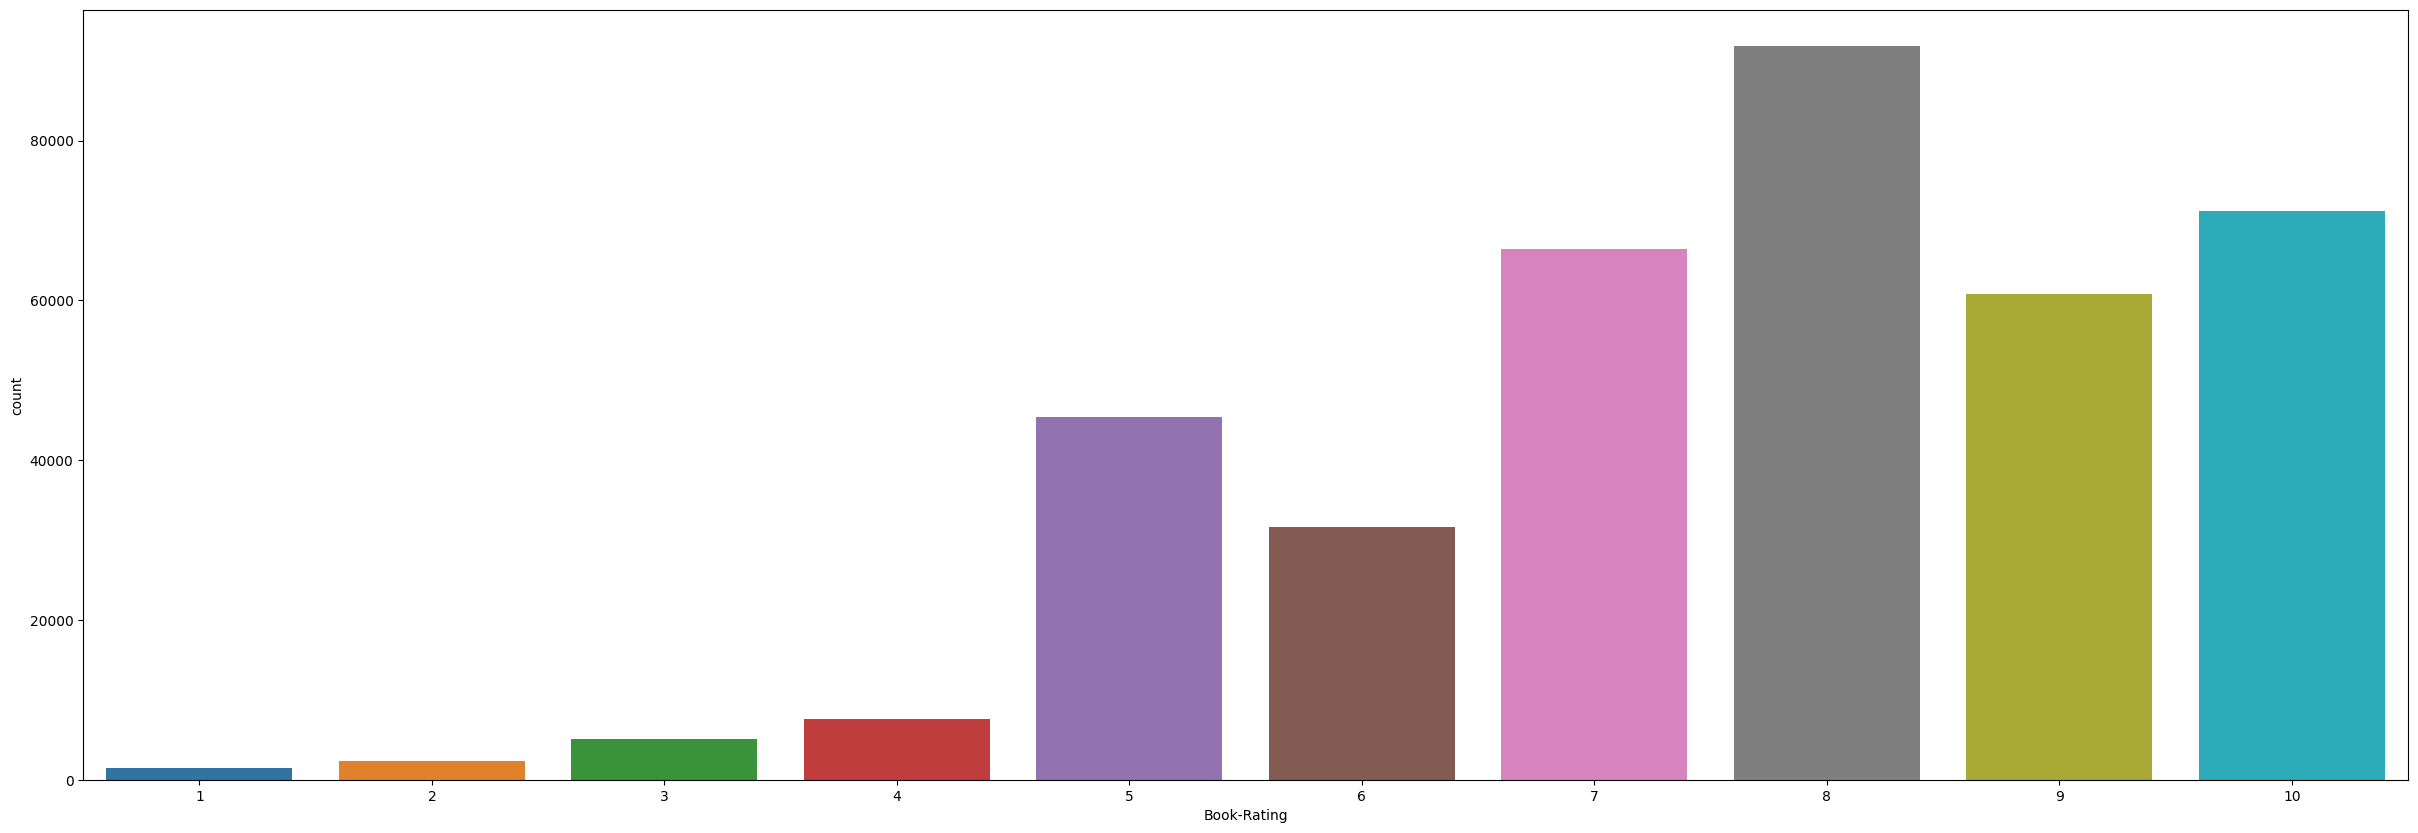

In [77]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] = (30, 10) #Setting the size of figure
#Distribution of ratings of books
z = ratings[ratings['Book-Rating']>0]
sns.countplot(x = 'Book-Rating' , data = z)

##### 1. Why did you pick the specific chart?

To see the distribution of ratings

##### 2. What is/are the insight(s) found from the chart?

Most books have got high ratings of 8 followed by 10 and 7 ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can conclude that any ratings below five means thebook has been highly disliked by people. The reason for dislike which can probably be the content of the books should be analyzed which will help in understanding what type of content people generally don't like.

#### Chart - 2

In [78]:
# Chart - 2 visualization code
#Authors who have written maximum number of books
z =  books_unique['Book-Author'].value_counts().sort_values(ascending = False)[:15]
print(z)


William Shakespeare     496
Agatha Christie         476
Ann M. Martin           395
Carolyn Keene           371
Francine Pascal         349
Stephen King            332
Barbara Cartland        300
Not Applicable (Na )    286
Isaac Asimov            286
R. L. Stine             278
Nora Roberts            270
Charles Dickens         232
Franklin W. Dixon       204
Terry Pratchett         198
Janet Dailey            185
Name: Book-Author, dtype: int64


<Axes: >

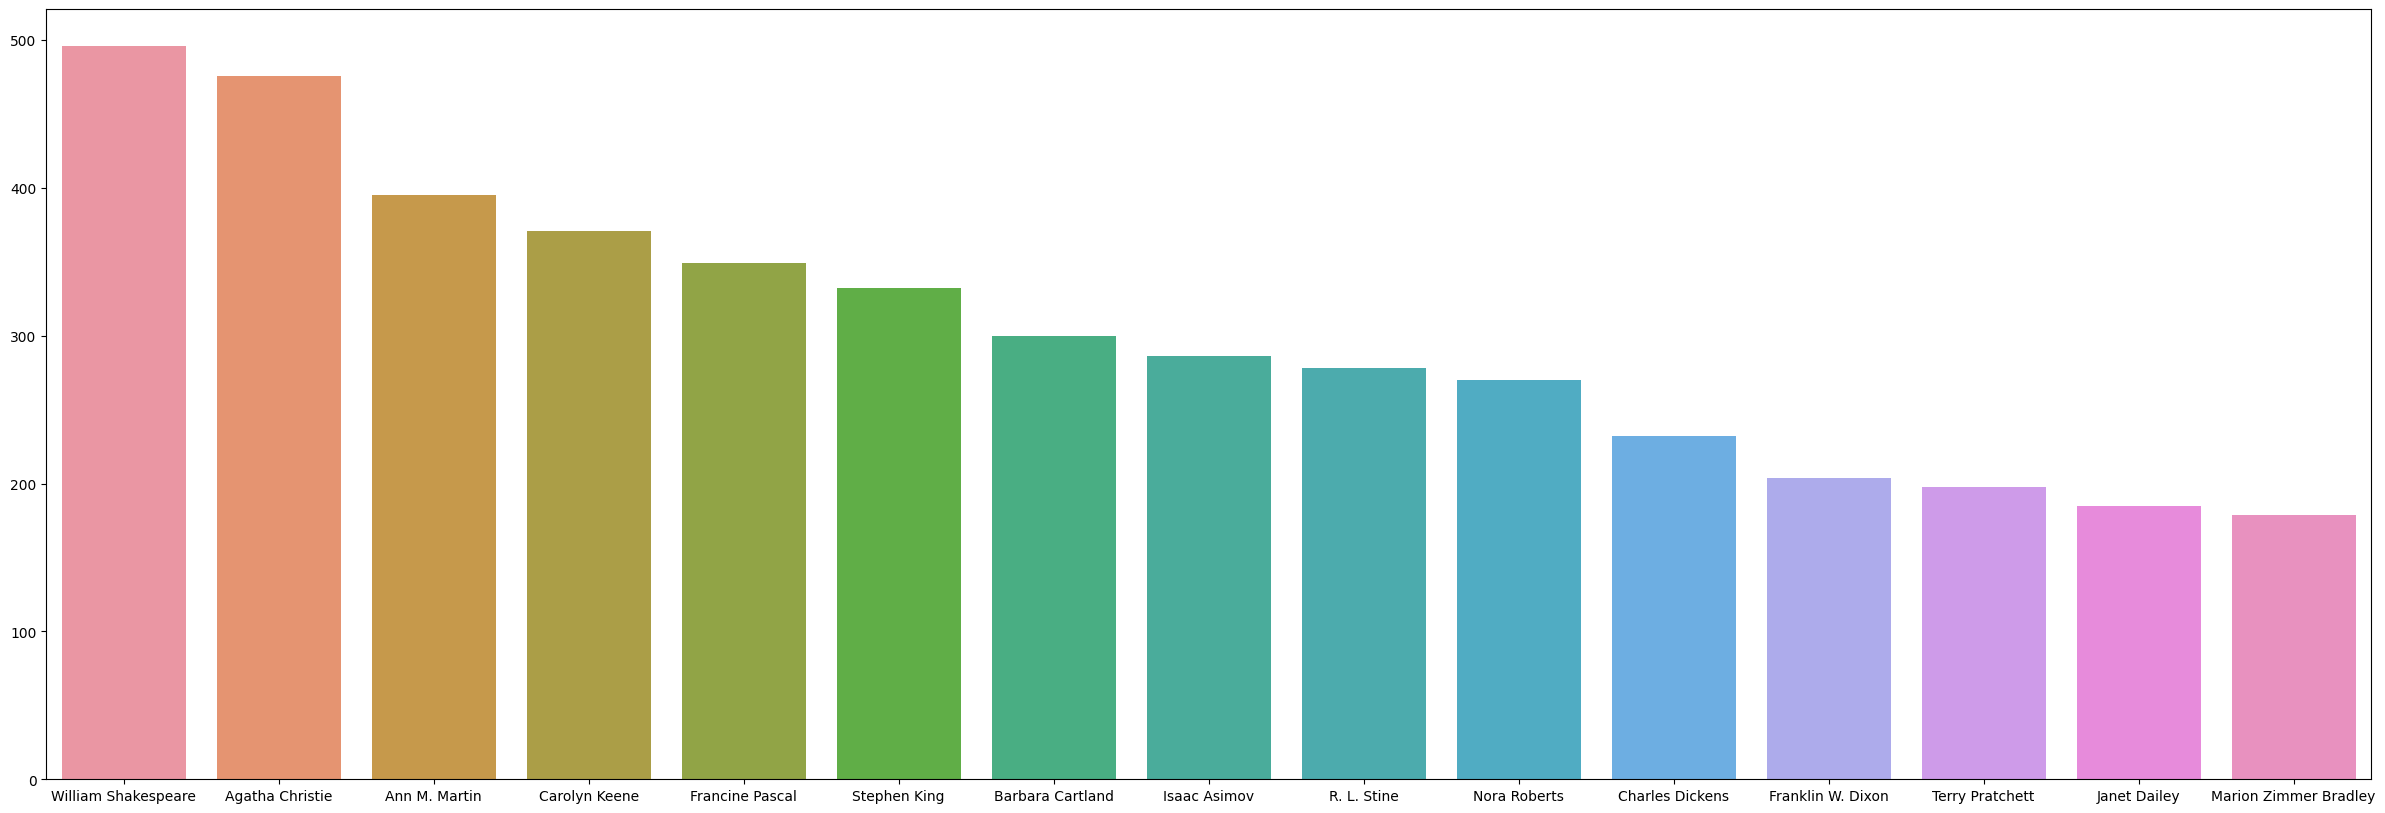

In [79]:
#Removing 'Not Applicable' from book Authors column
books_unique = books_unique[books_unique['Book-Author'] !='Not Applicable (Na )']
#Plotting the barchart to see the author who have written maximum number of books in our dataset
z =  books_unique['Book-Author'].value_counts().sort_values(ascending = False)[:15]
sns.barplot(x = z.index , y =  z.values )

##### 1. Why did you pick the specific chart?

To know the authors who have written maximum number of books in our dataset.

##### 2. What is/are the insight(s) found from the chart?

William Shakespeare has written maximum number of books

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Authors who have written many books may probably also be  among most liked Authors.

#### Chart - 3

<Axes: >

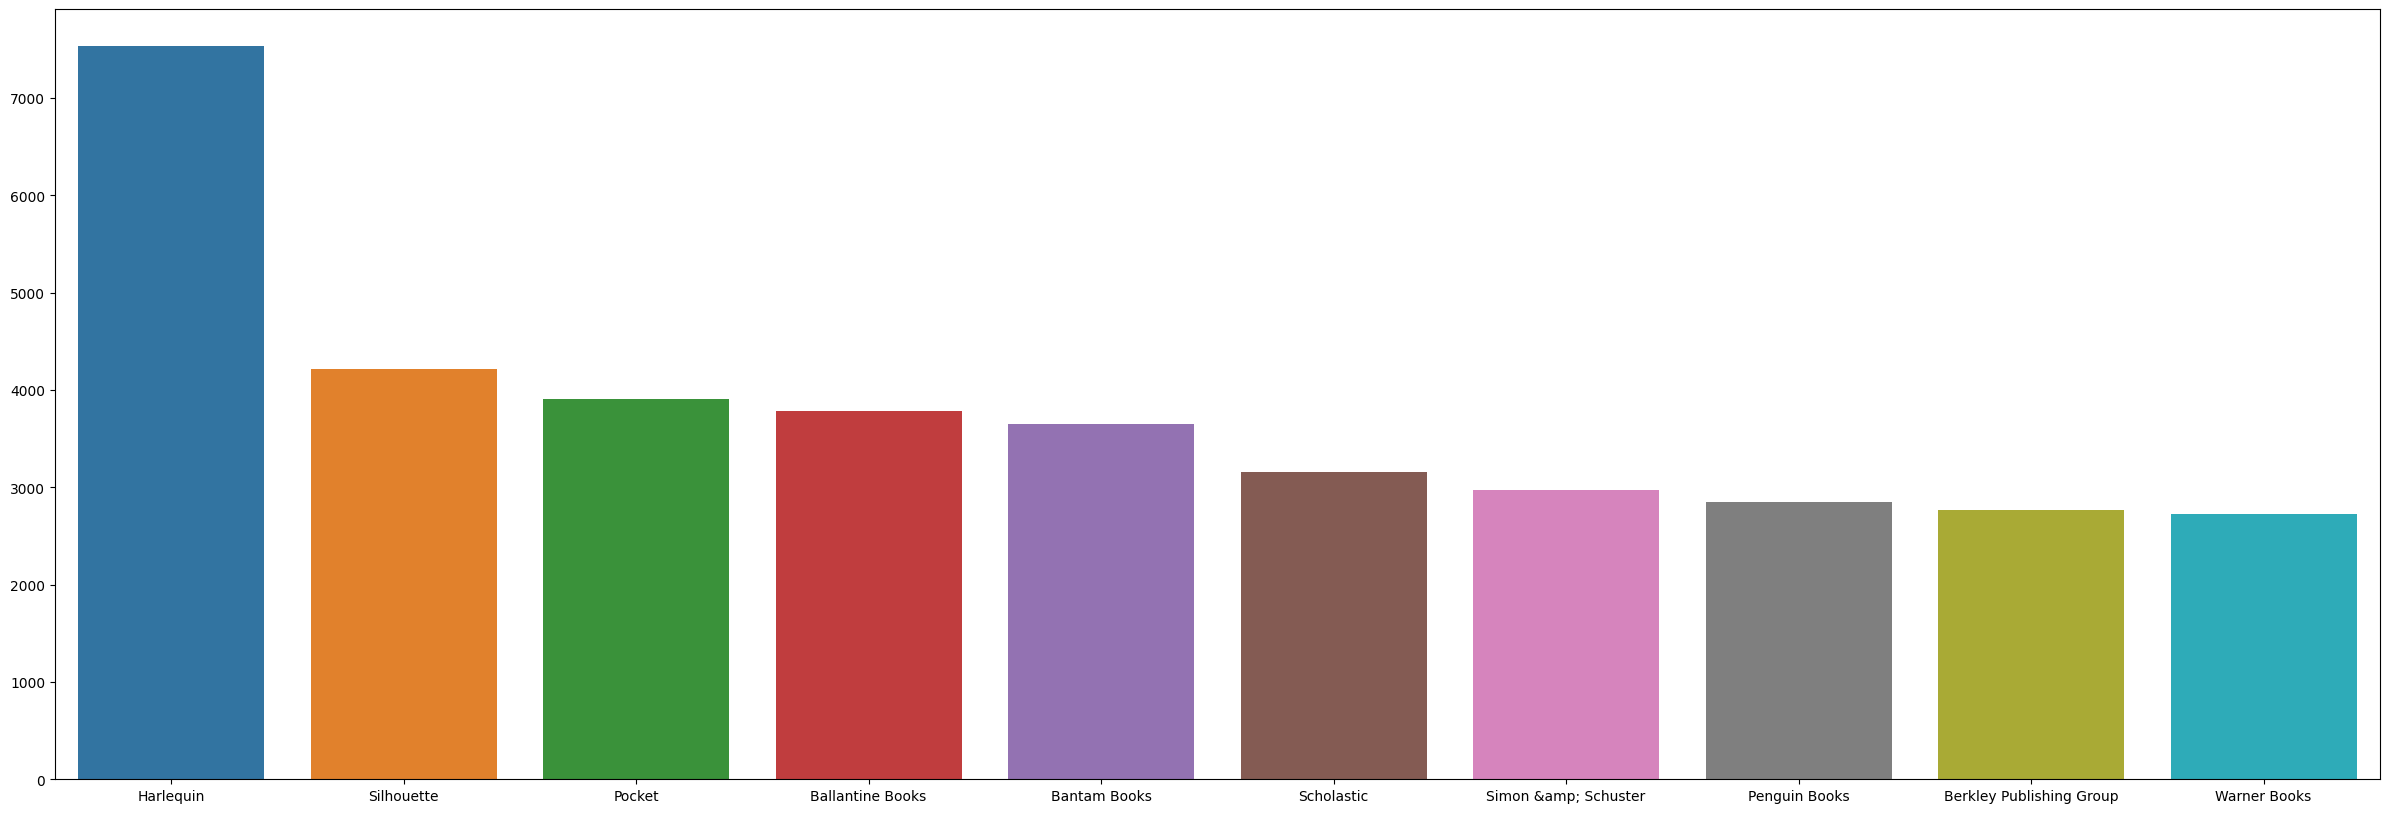

In [80]:
# Chart - 3 visualization code
#Barplot to know which authors have published most books
z = books['Publisher'].value_counts().sort_values(ascending = False)[:10]
sns.barplot(x = z.index , y = z.values)

##### 1. Why did you pick the specific chart?

To know which authors have published most books

##### 2. What is/are the insight(s) found from the chart?

Most books has been published by the Ballantine Books

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart gives us an idea of most popular publishers

#### Chart - 4

<Axes: >

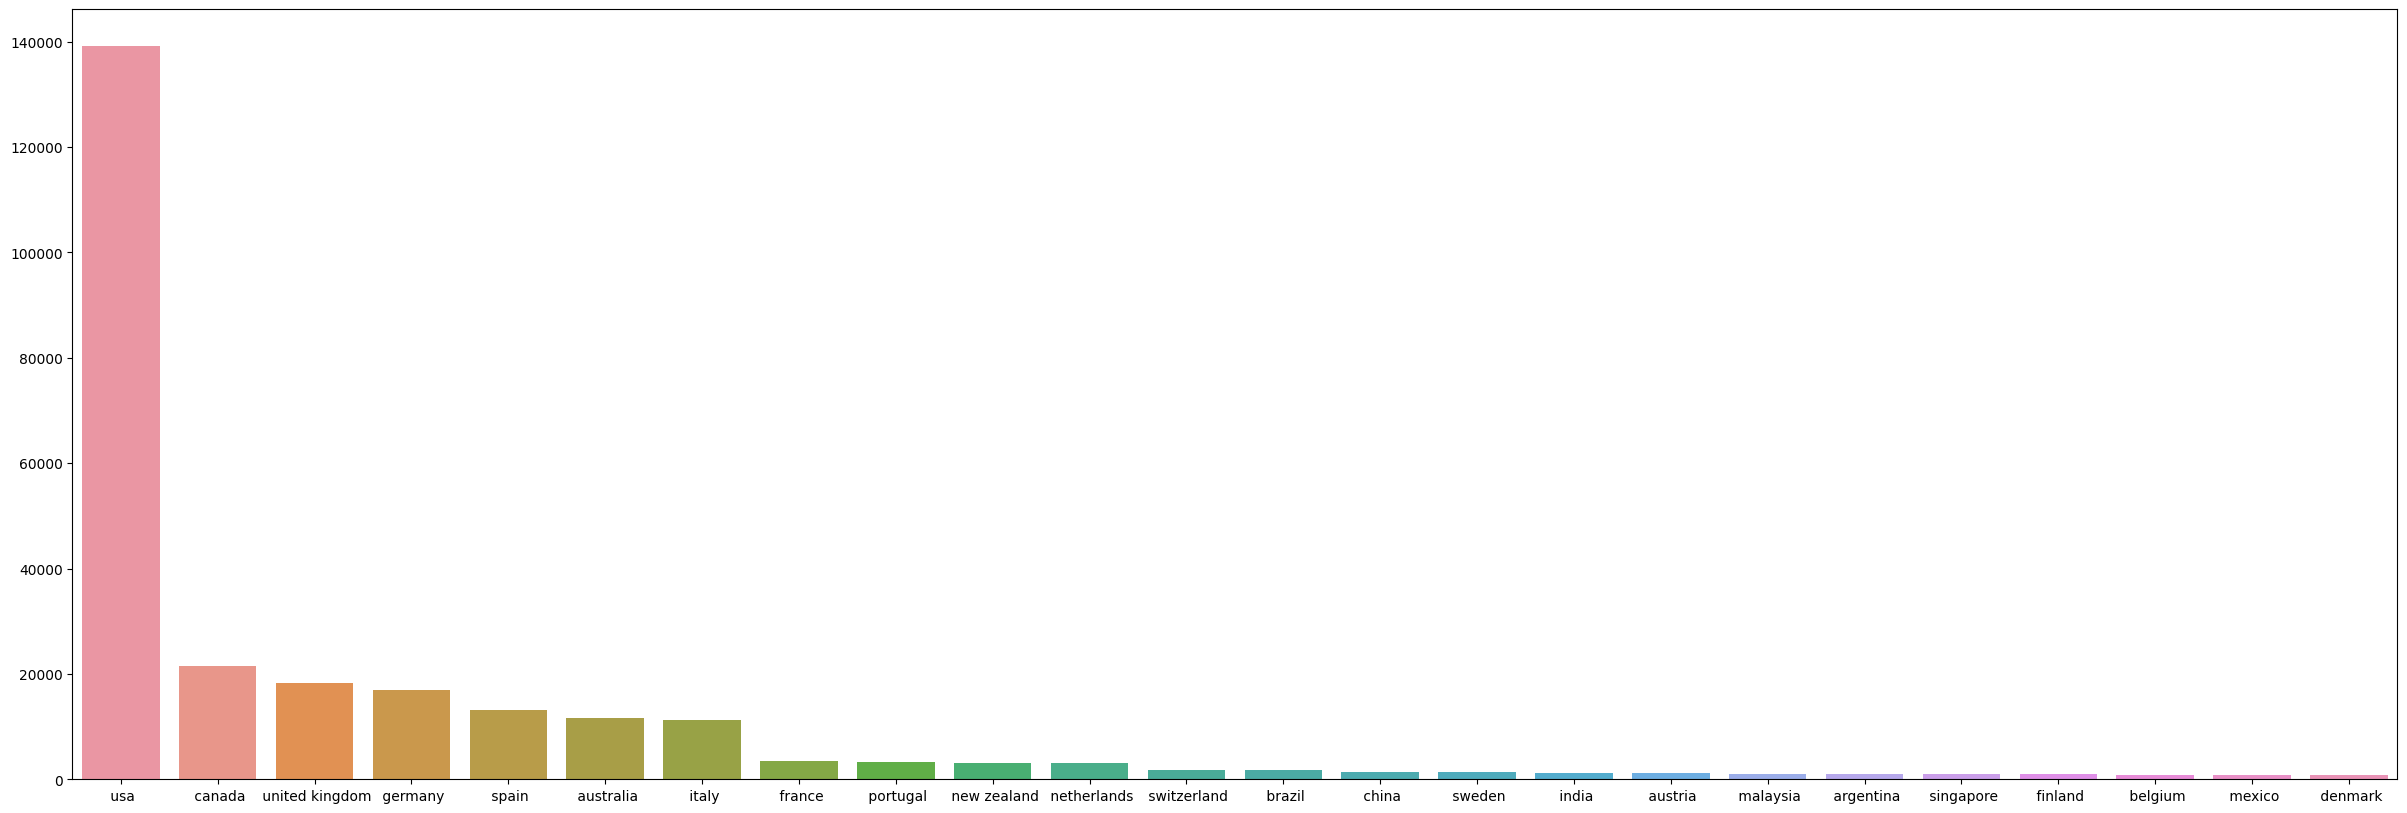

In [81]:
# Chart - 4 visualization code
#The countplot gives us the count of users according to country name
user_count_by_country =  users['country'].value_counts().sort_values(ascending = False)[:25]
user_count_by_country = user_count_by_country[user_count_by_country.index != '']
sns.barplot(x= user_count_by_country.index ,y  =  user_count_by_country.values)

##### 1. Why did you pick the specific chart?

Which country has the most book readers

##### 2. What is/are the insight(s) found from the chart?

USA has the most book readers followed by Canada , United Kingdom , Germany and others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The business can make strategies acoording to distribution of book sale across countries

#### Chart - 5

<Axes: xlabel='year', ylabel='count'>

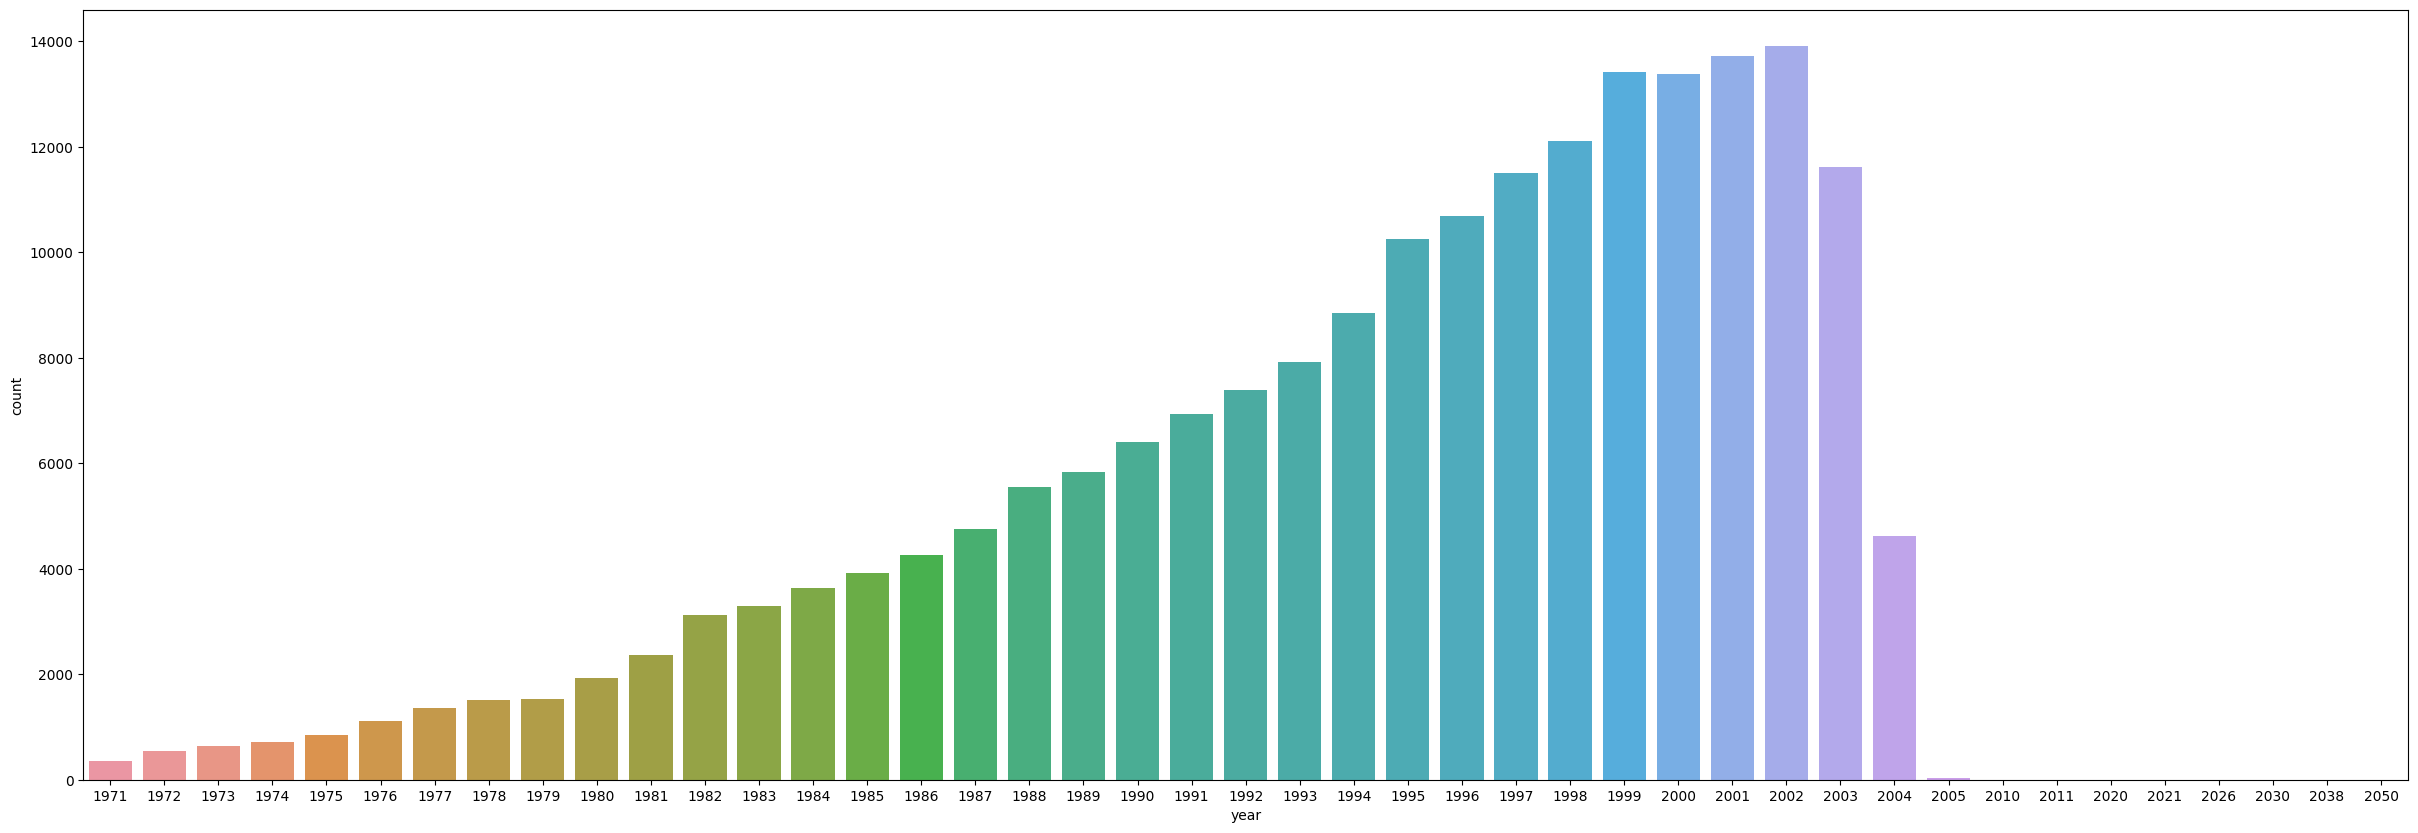

In [82]:
# Chart - 5 visualization code
#Distribution of books publication after year 1970 onwards
books_year = books[books['year'] >  1970]['year']
sns.countplot(x = books_year)

##### 1. Why did you pick the specific chart?

To observe the publication of book from year 1970 onwards

##### 2. What is/are the insight(s) found from the chart?

The publication of the  books has been almost consistently increasing upto 2002

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The publication of books has decreased after year 2002 which might be due to alternate digital sources of content consumption.

#### Chart - 6

<Axes: ylabel='Density'>

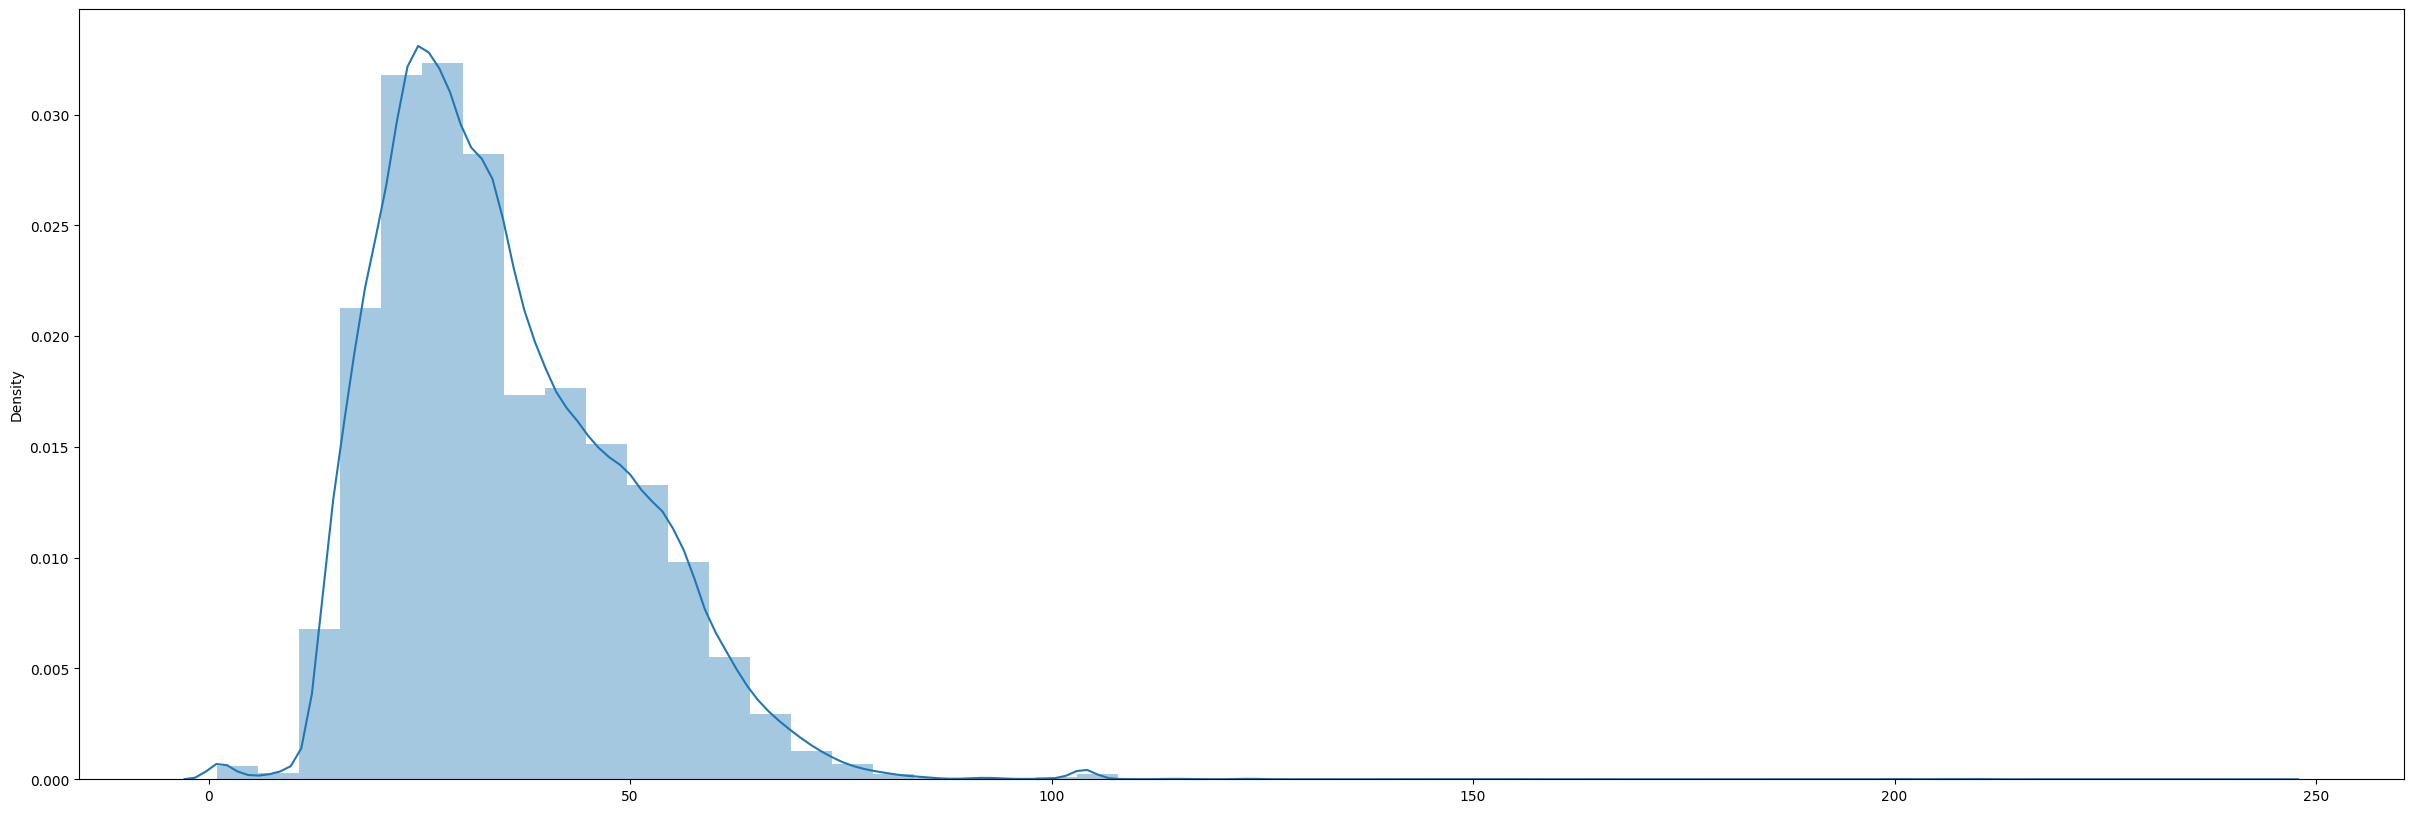

In [83]:
# Chart - 6 visualization code
#Distribution of the age of the users
sns.distplot(x = users[users['Age'] !=0]['Age'])

##### 1. Why did you pick the specific chart?

To look at the distribution of the age of the users

##### 2. What is/are the insight(s) found from the chart?

Most users are young and below thirty years of age

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It should be investigated as why people lose interest in books when they Age and what type of books do they prefer

#### Chart - 7

<Axes: xlabel='Age category', ylabel='count'>

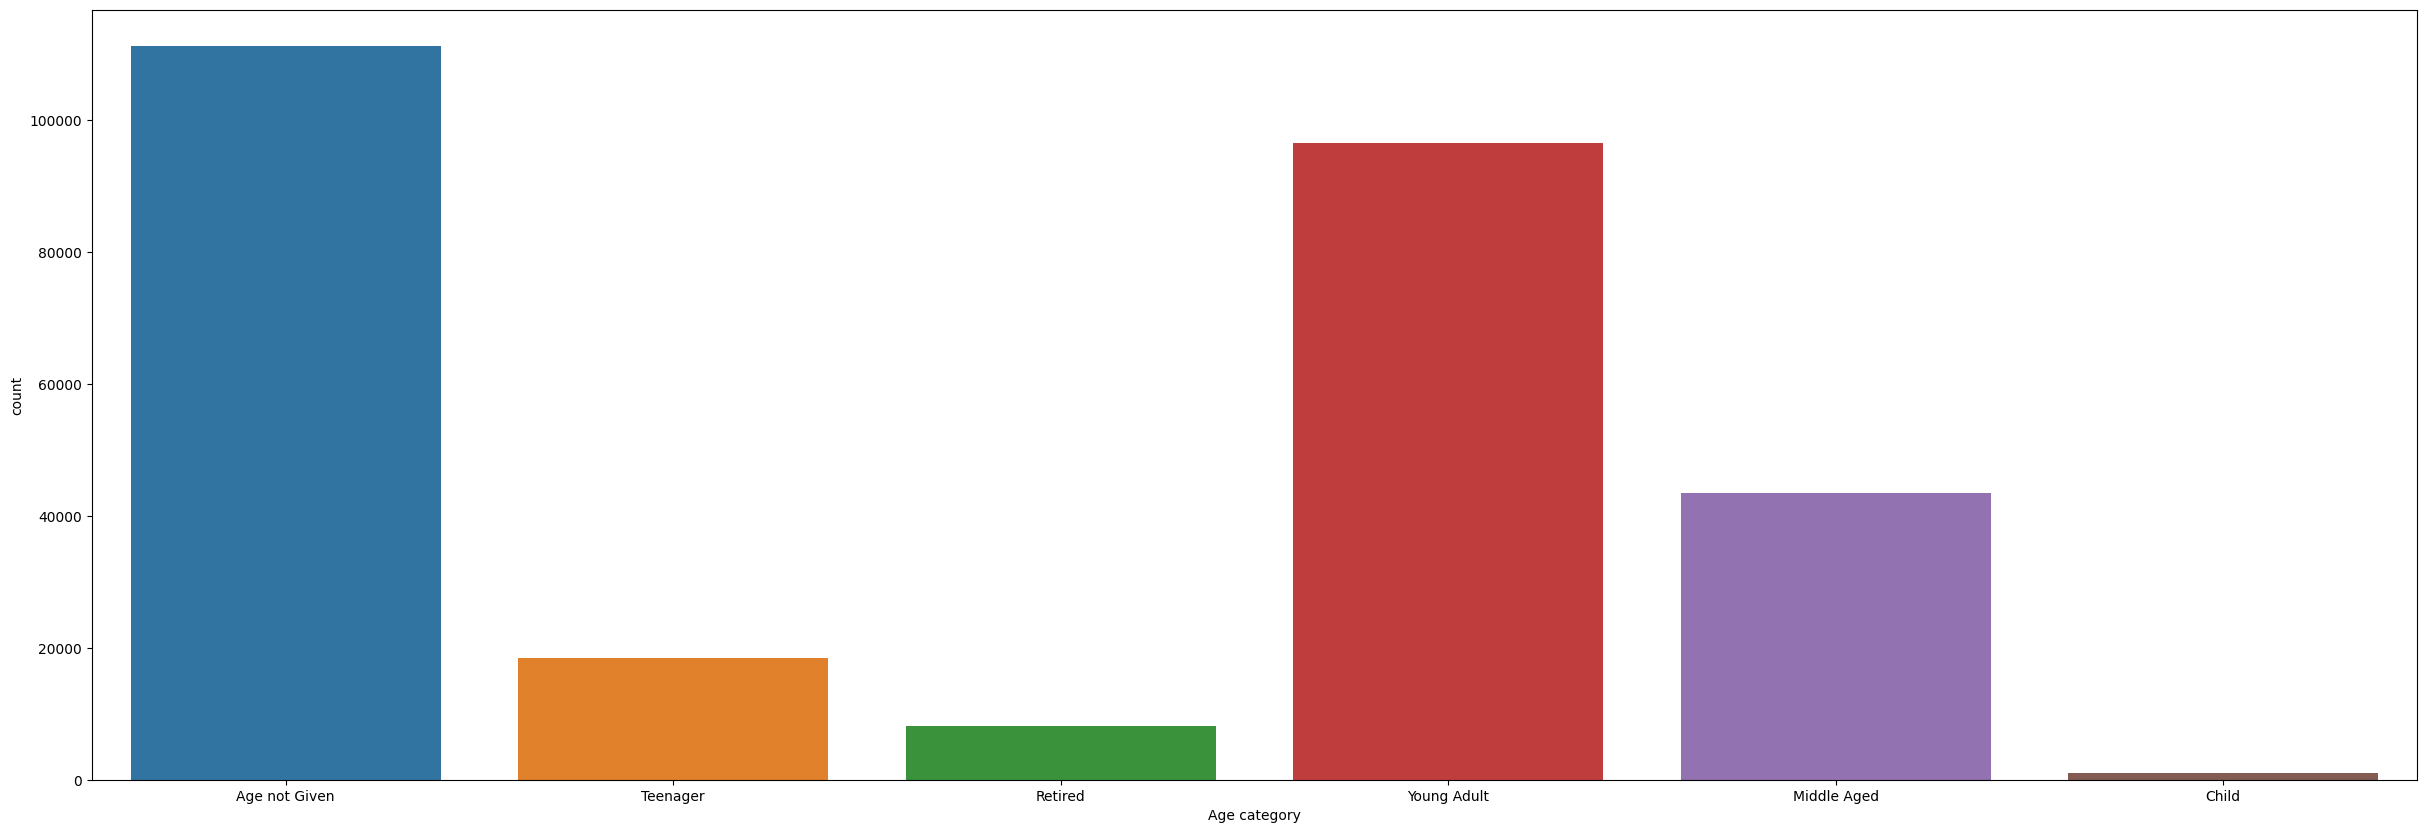

In [84]:
# Chart - 7 visualization code
#Plot to get the distribution of books according to their Age category.
sns.countplot(x = users['Age category'])

##### 1. Why did you pick the specific chart?

To see distribution of books according to different  age groups of people

##### 2. What is/are the insight(s) found from the chart?

Most of the book readers are Young adults followed by Middle aged people

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8

<Axes: >

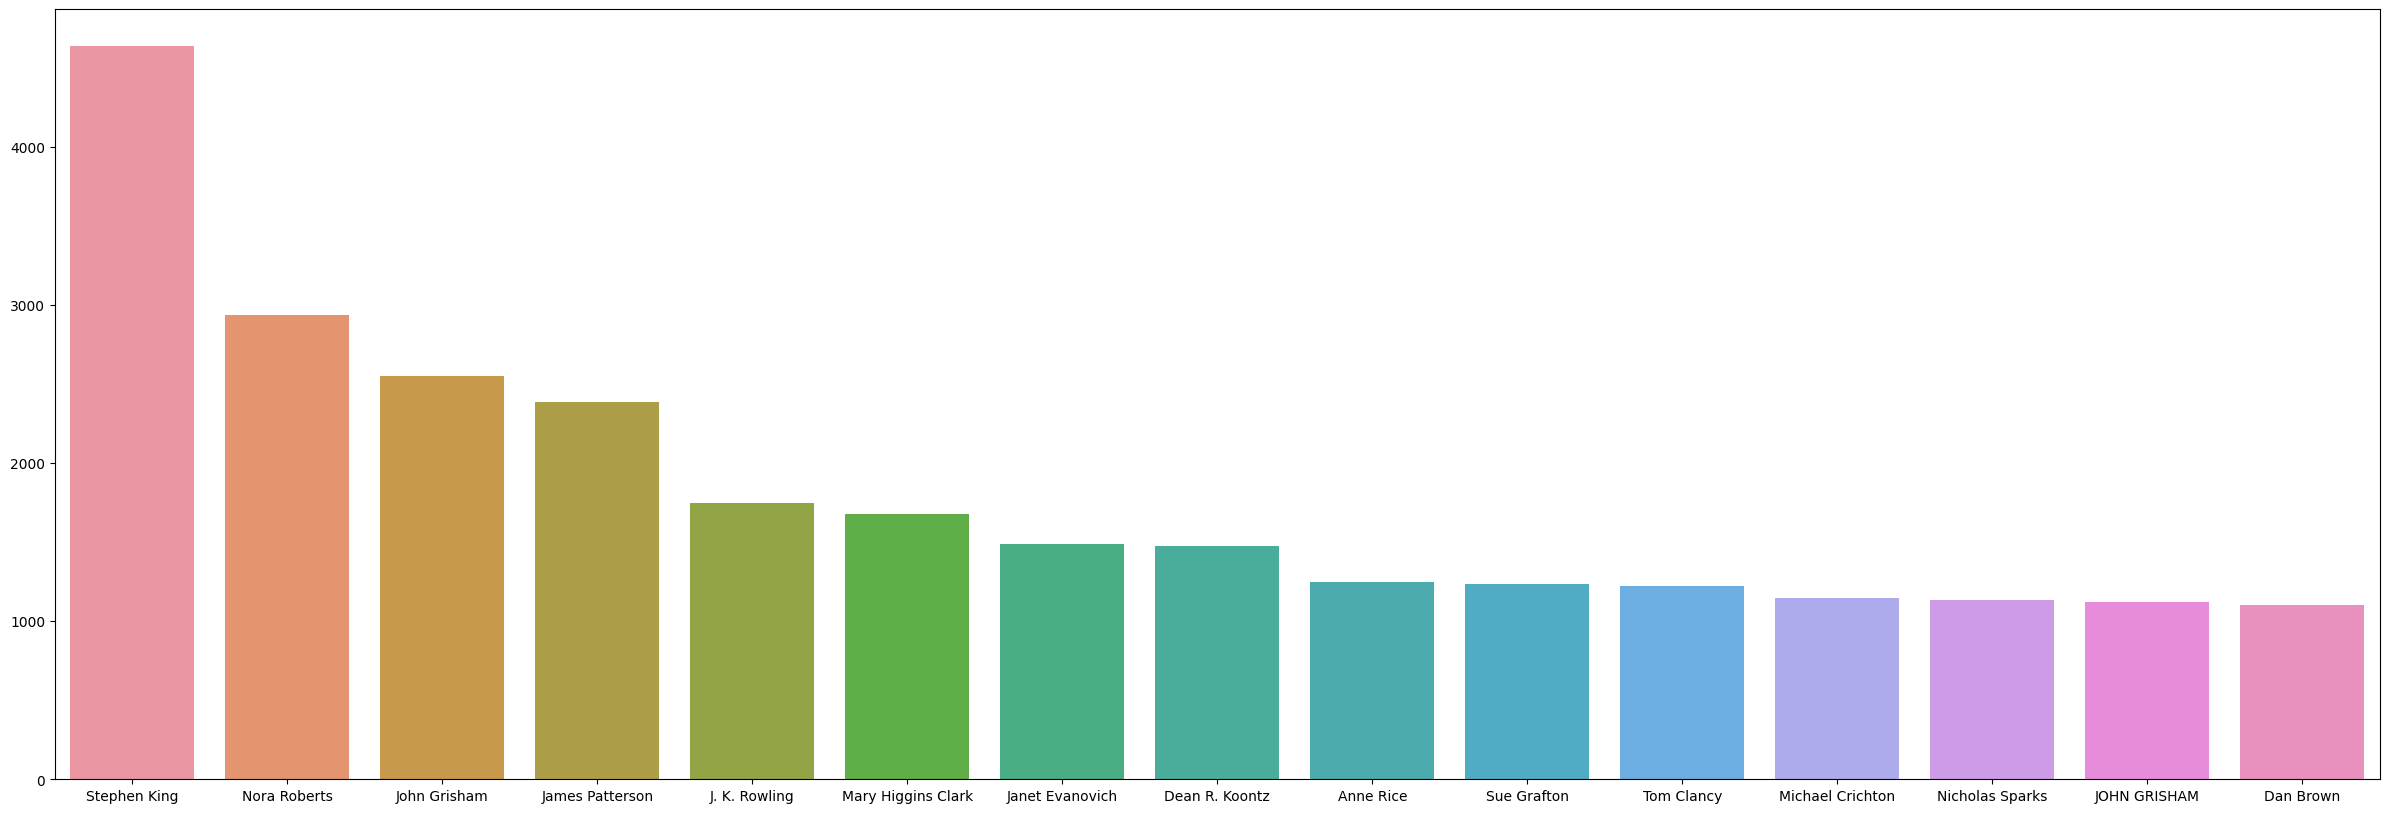

In [85]:
# Chart - 8 visualization code
#The barplot represents the top Authors with maximum number of books rated and sold.
z = book_ratings['Book-Author'].value_counts().sort_values(ascending = False)[:15]
sns.barplot(x= z.index , y = z.values)

##### 1. Why did you pick the specific chart?

To find out the Authors whose books has been sold most.

##### 2. What is/are the insight(s) found from the chart?

Books of Stepen King has been brought most.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The books by theses authors can be marketed easily in the name of books of Best selling Authors

#### Chart - 9

<Axes: xlabel='ISBN', ylabel='Book-Title'>

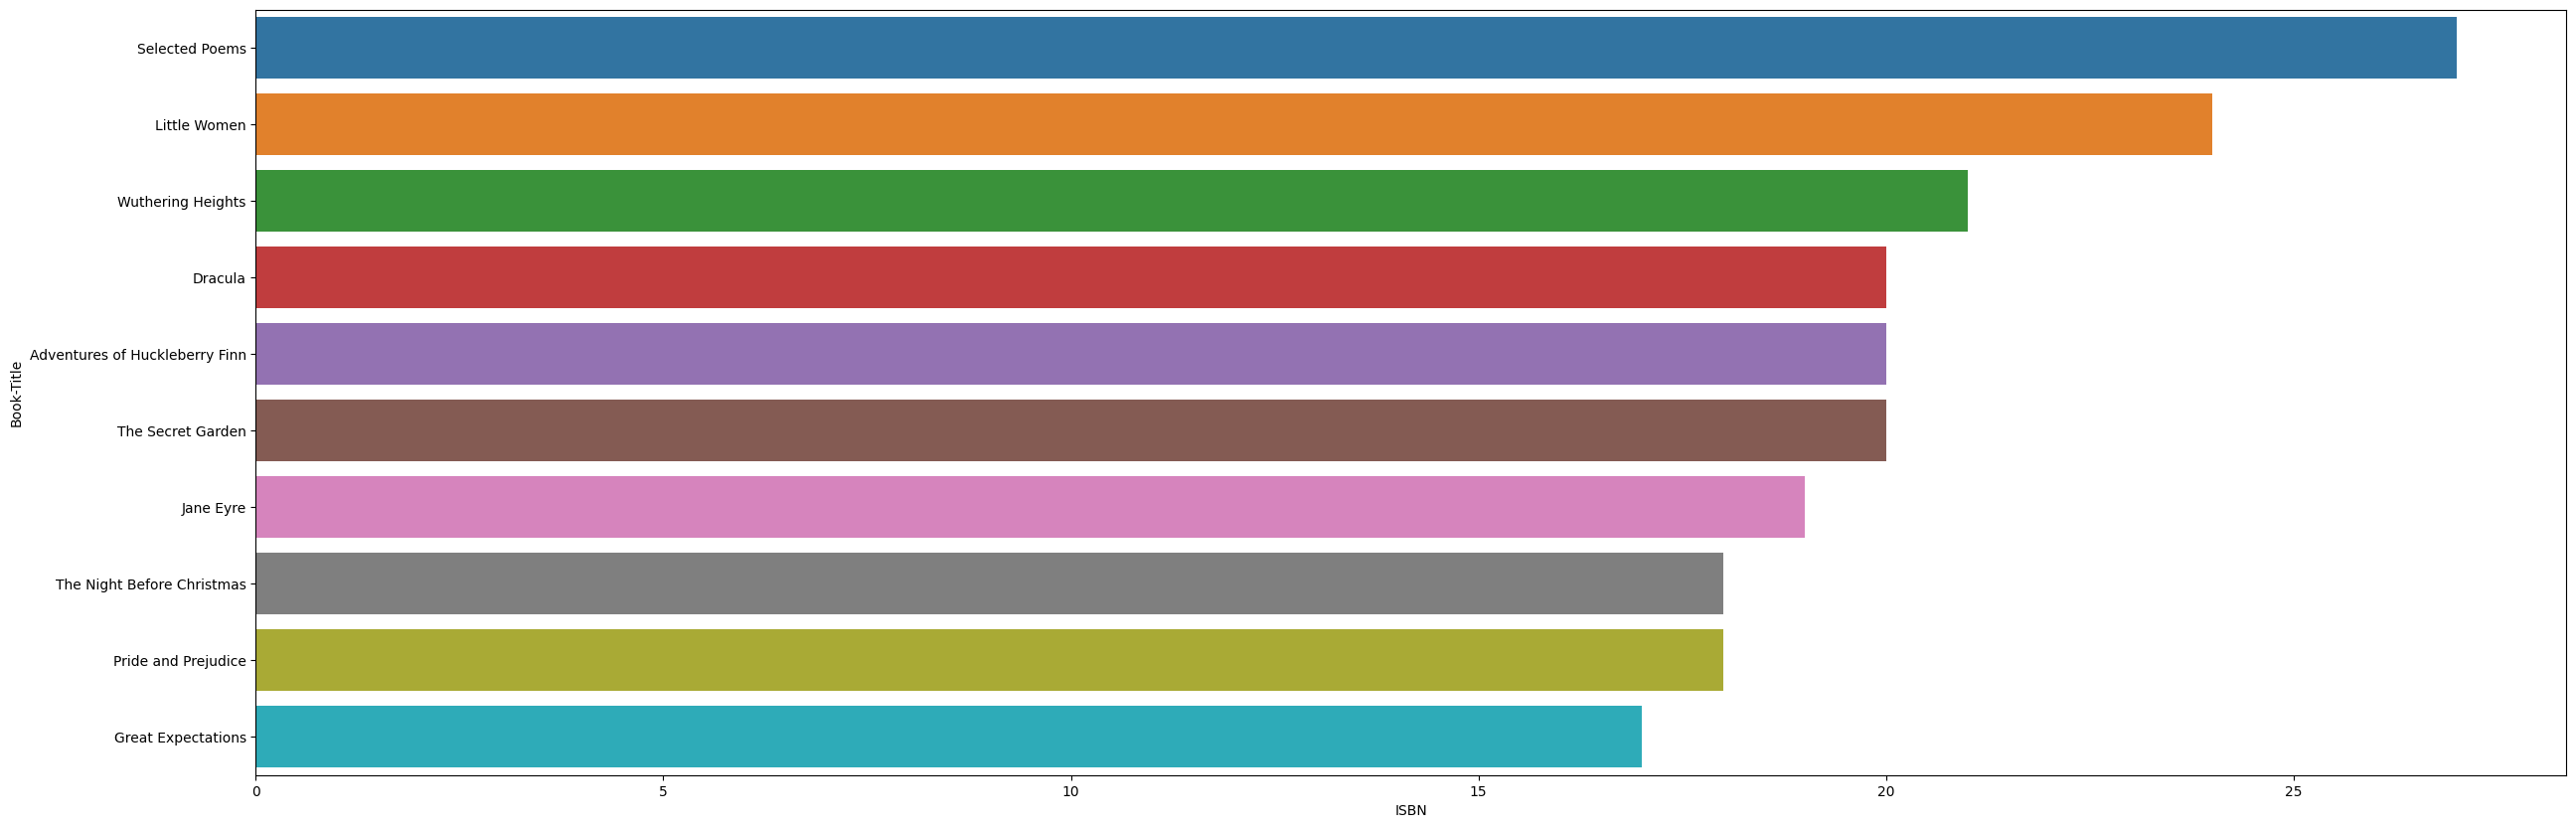

In [86]:
# Chart - 9 visualization code
#Books published most number of times by different publishers
z = books.groupby('Book-Title').count().sort_values(by = 'ISBN',ascending = False)[:10]
sns.barplot(x =  z['ISBN'],y =   z.index)

##### 1. Why did you pick the specific chart?

To find out the books which has been published by different publishers

##### 2. What is/are the insight(s) found from the chart?

The book 'Selected Poems' has been published most by differentb publishers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

([<matplotlib.patches.Wedge at 0x7f762555b430>,
 [Text(0.4394770388660016, 1.0356084840853568, 'Rated'),
  Text(-0.4297108824467568, -1.0125949622167938, 'Not Rated')],
 [Text(0.24415391048111196, 0.5753380467140872, '37.2%'),
  Text(-0.23438775406186732, -0.5523245248455237, '62.8%')])

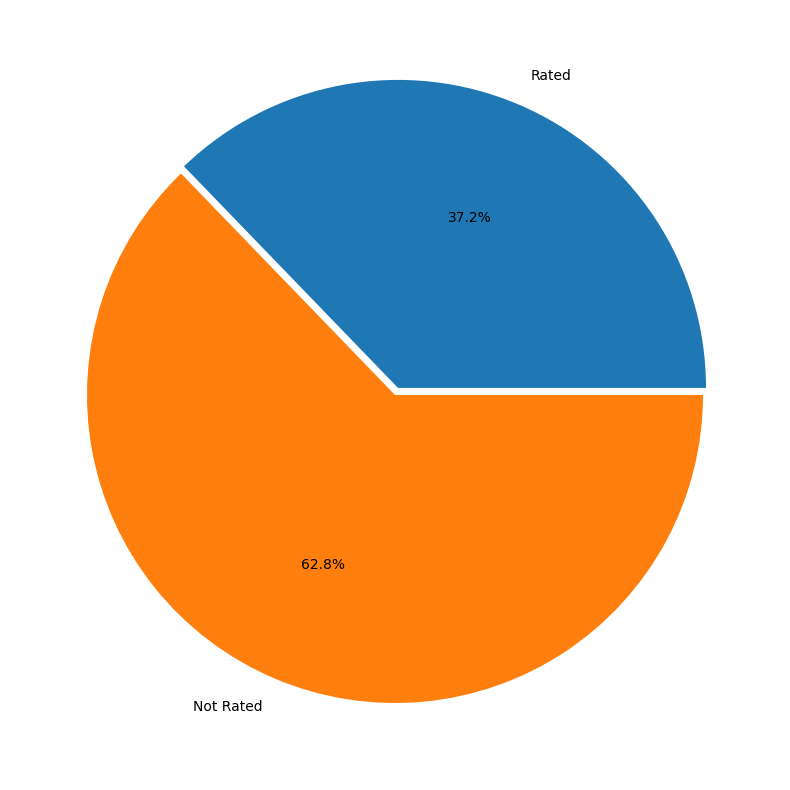

In [87]:
# Chart - 10 visualization code
#Visual Comparison of rated and not rated books using piechart
not_rated = len(ratings_original[ratings_original['Book-Rating'] == 0])
rated = len(ratings_original) - not_rated
plt.pie([rated,not_rated] , labels = ['Rated' , 'Not Rated'] , explode = [0.025 , 0],autopct="%1.1f%%")

##### 1. Why did you pick the specific chart?

To know how many books have been rated and how many have been not

##### 2. What is/are the insight(s) found from the chart?

Nearly 63 percent users don't rate books

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Business should insist users to rate books as ratings are most essential to understanding users likes and dislikes towards books which is very necessary to have clarity to take future decisions.

#### Chart - 11

<Axes: xlabel='Average-Ratings', ylabel='Book-Title'>

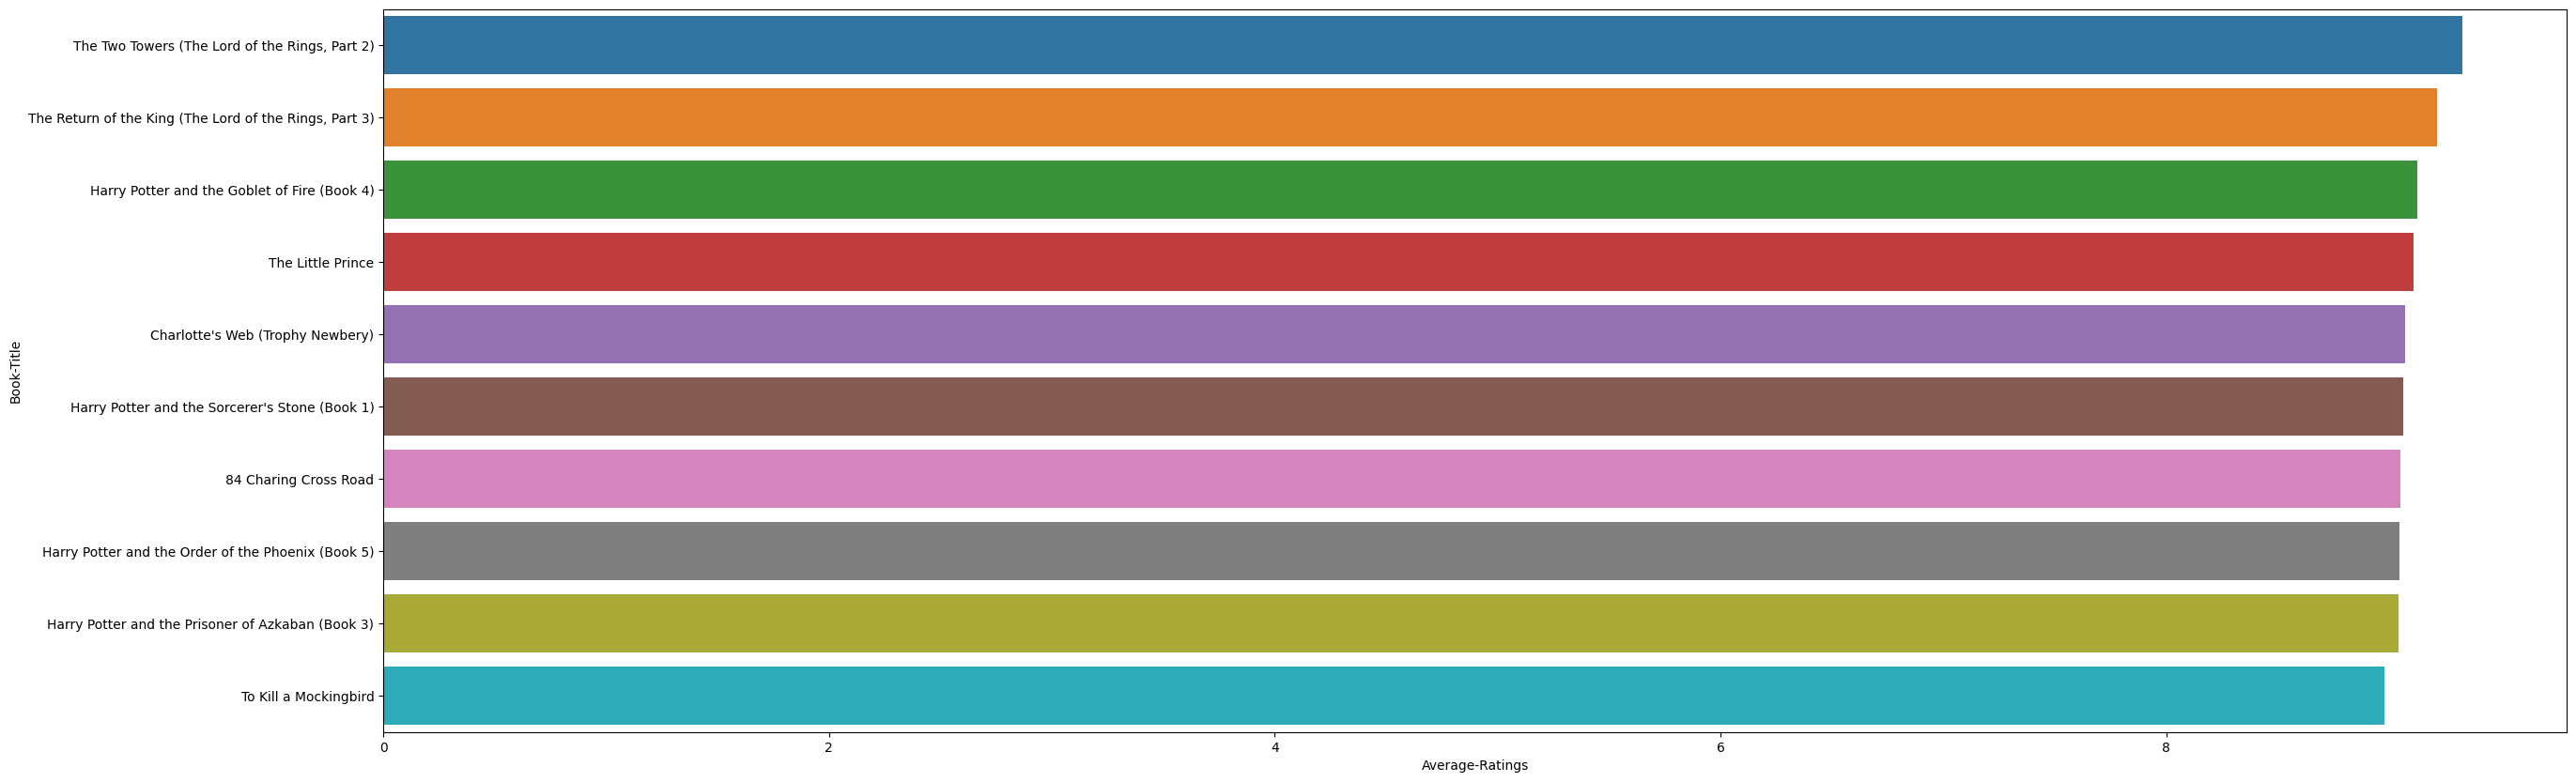

In [88]:
# Chart - 11 visualization code
# To get top rated books with a minimum of  ratings by more than fifty users
temp  = average_numbers_of_ratings[average_numbers_of_ratings['Number of Rating'] > 50].sort_values('Average-Ratings', ascending = False)[:10]
sns.barplot( x = temp['Average-Ratings'],y = temp['Book-Title'])

##### 1. Why did you pick the specific chart?

To see the top ten books with most ratings

##### 2. What is/are the insight(s) found from the chart?

The Two Towers (The Lord of the Rings , Part 2) is the best rated book among books rated by minimum of fifty users

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='year', ylabel='Book-Title'>

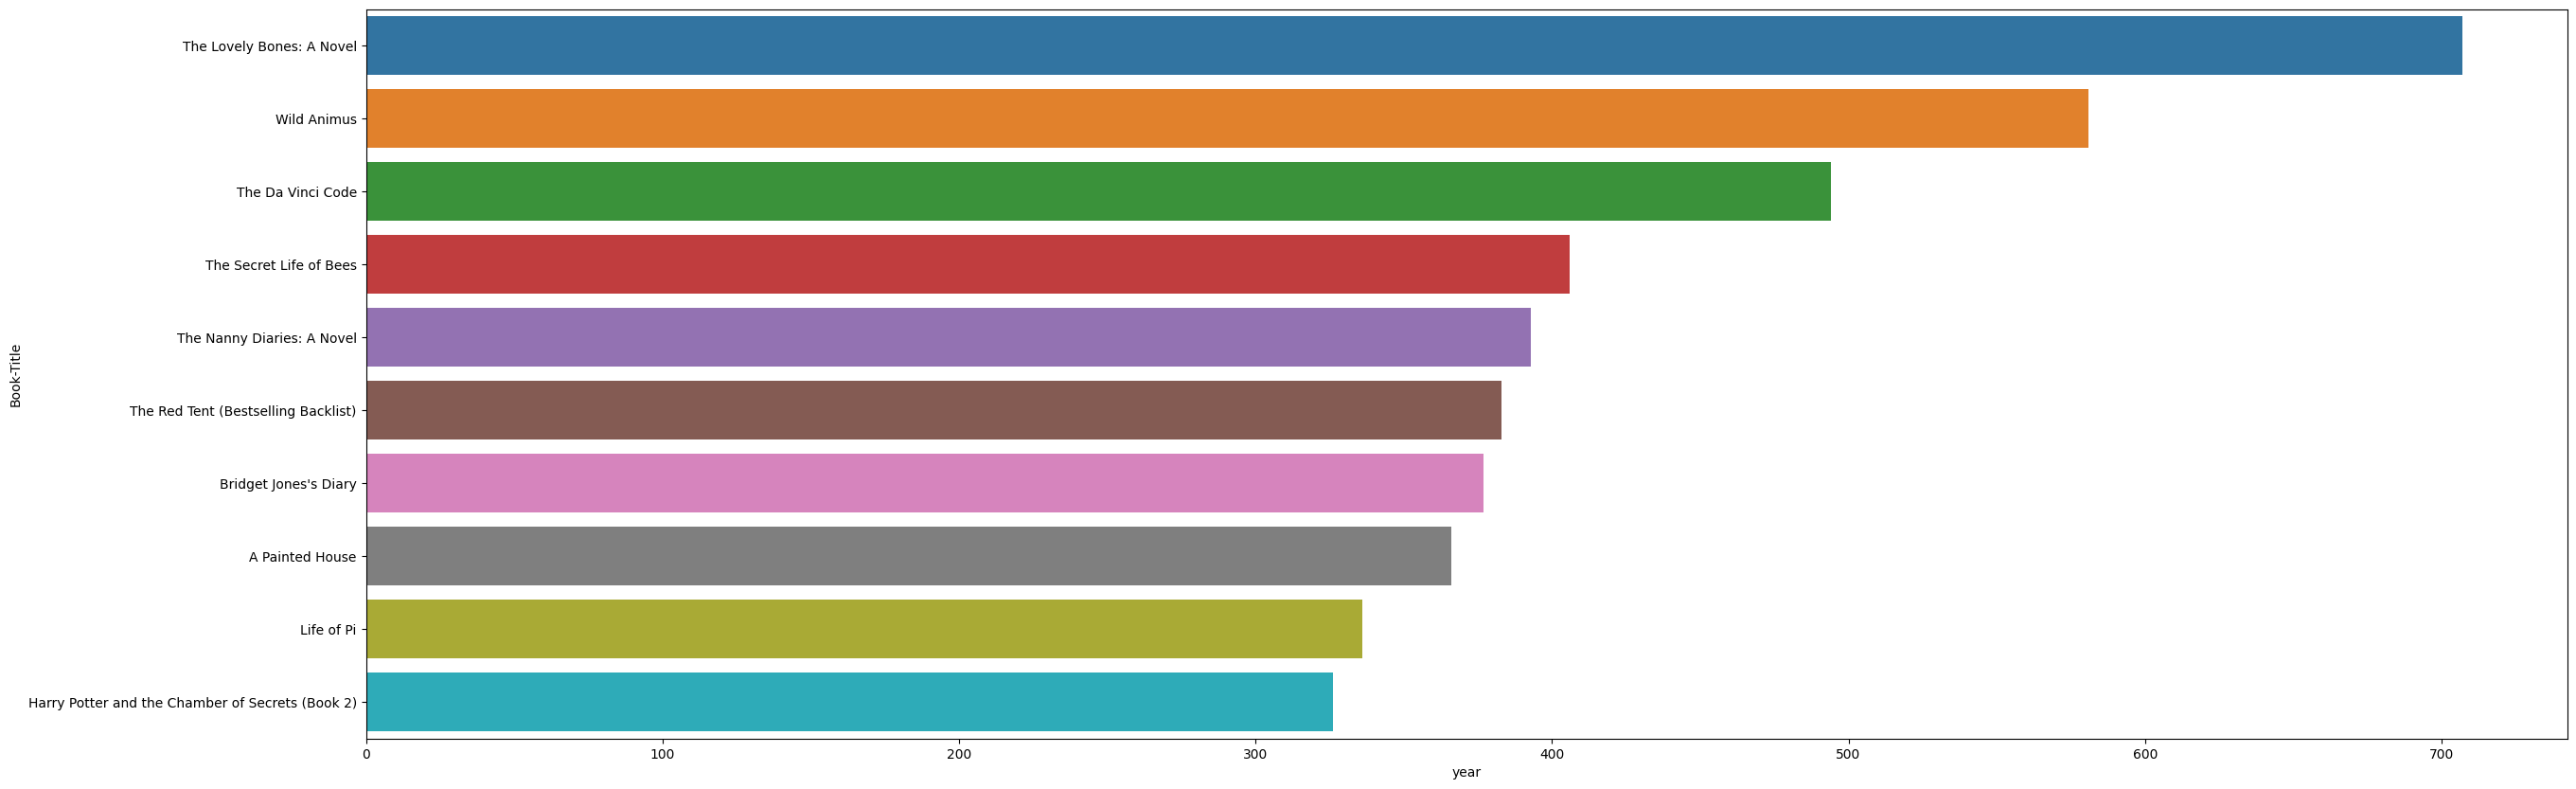

In [89]:
# Chart - 12 visualization code
#Books with maximum sell
z = book_ratings.groupby('Book-Title').count().sort_values(by = 'ISBN',ascending = False)[:10]
sns.barplot(x = z['year'] ,y =  z.index )

##### 1. Why did you pick the specific chart?

To see the top ten books with best average ratings.

##### 2. What is/are the insight(s) found from the chart?

'The Lovely Bones : A Novel 'is the top rated book rated by most users

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The top rated books can be marketed as the most loved books

#### Chart - 13

<Axes: xlabel='country'>

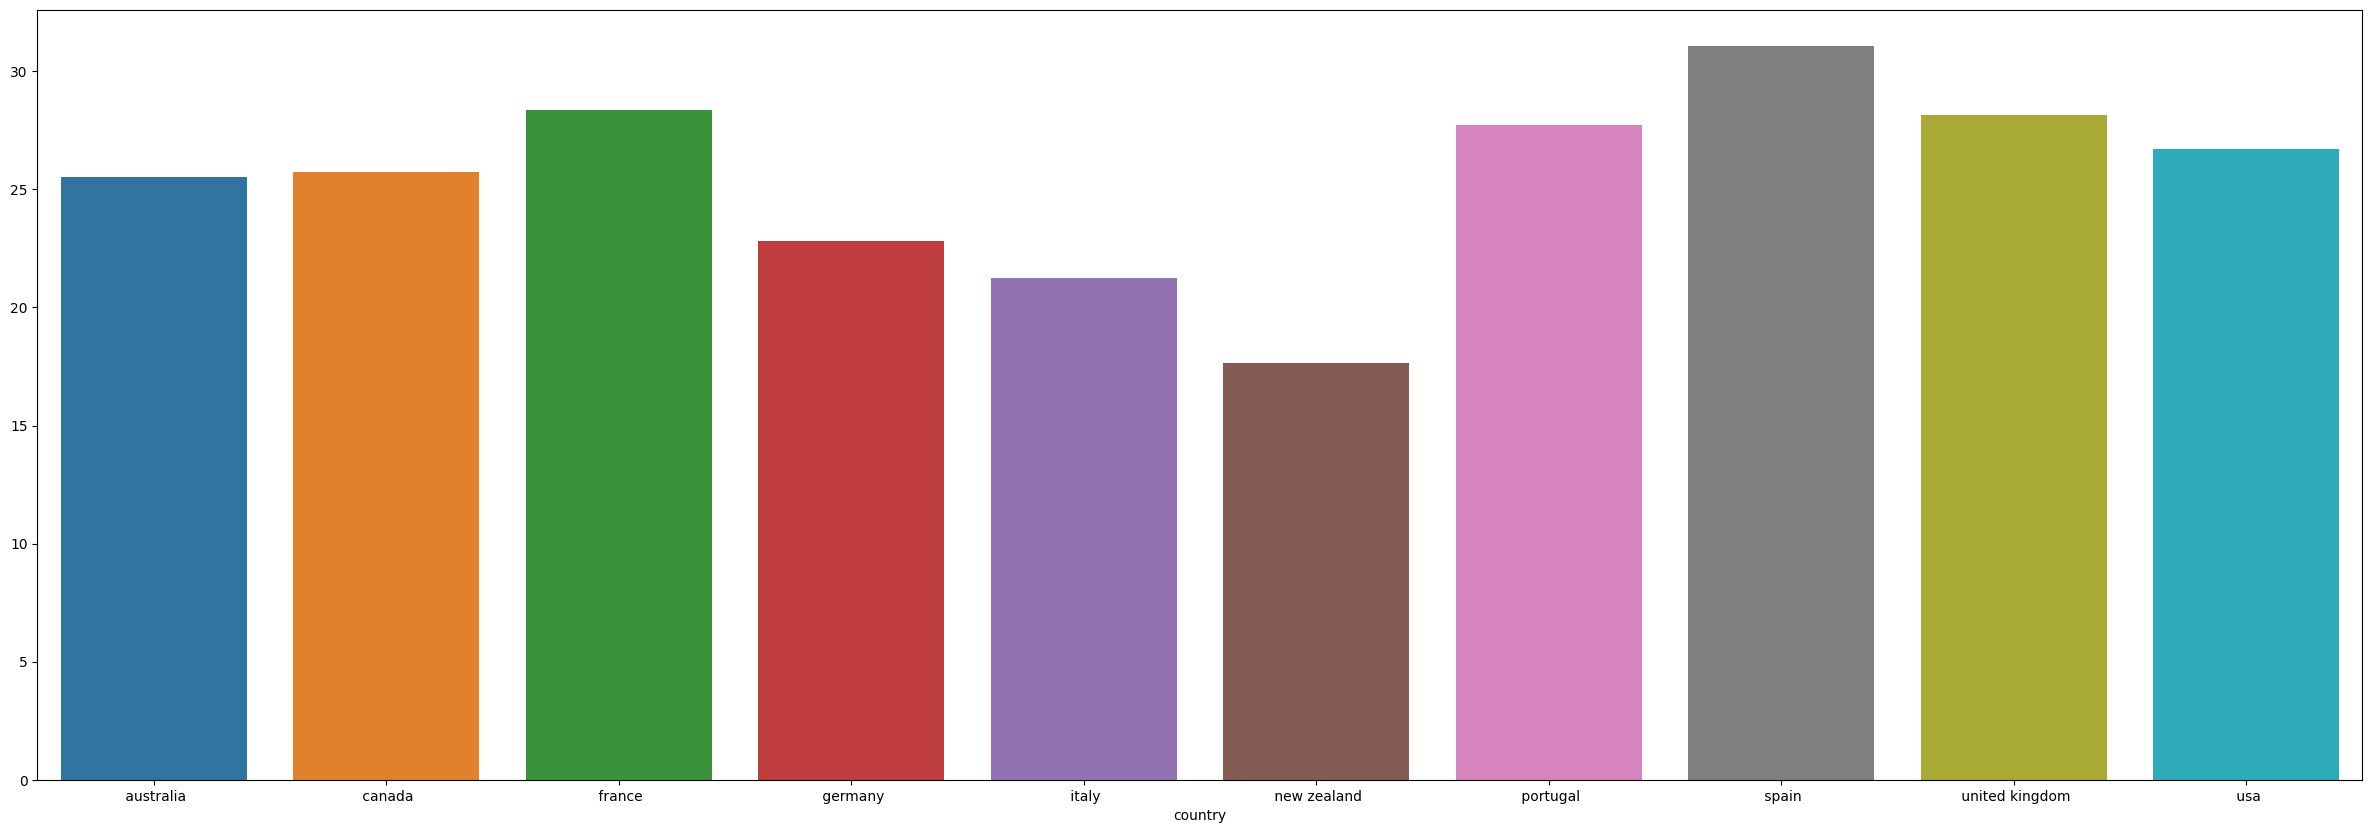

In [90]:
# Chart - 13 visualization code
#Barplot to show average Age of book readers of top ten book reading countries
temp  = user_ratings[user_ratings.country.isin(user_count_by_country.index[:10])]
temp1 = temp.groupby('country').mean()['Age']
sns.barplot(x = temp1.index , y =  temp1.values)

##### 1. Why did you pick the specific chart?

To show average Age of book readers of top ten book reading countries

##### 2. What is/are the insight(s) found from the chart?

Among the top ten book reading countries newzealand has the lowest average age and spain has the highest average age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

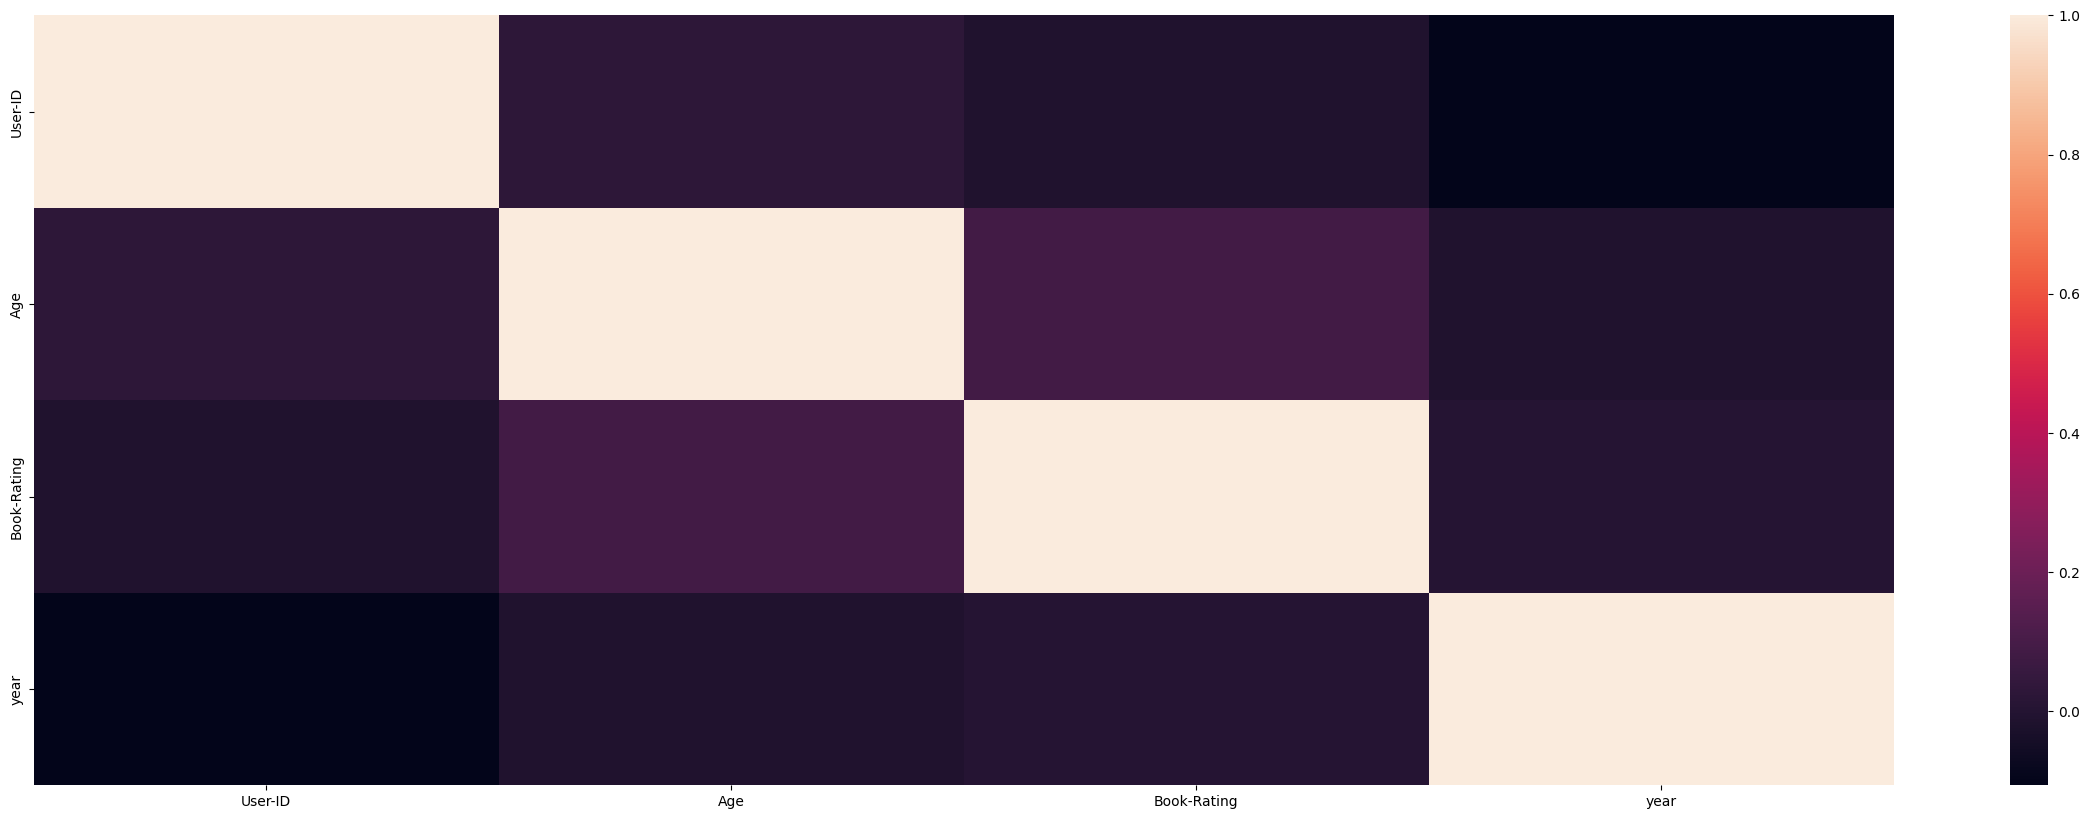

In [91]:
# Correlation Heatmap visualization code
#Shows correlation between the numeric variable of our datasets
sns.heatmap(Final_Dataset.corr())

##### 1. Why did you pick the specific chart?

To see correlation between all the numeric variables in our dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

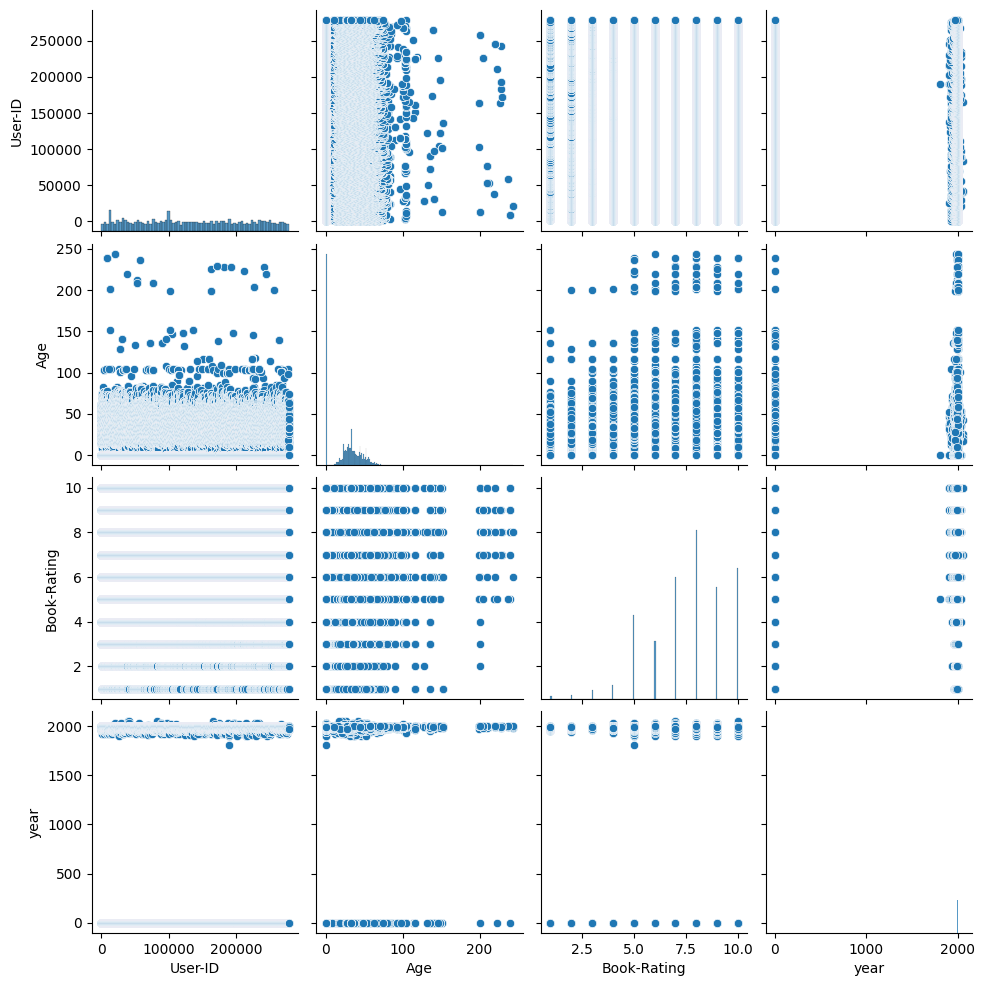

In [92]:
# Pair Plot visualization code
#Shows relation between every pair of variables in our dataset
sns.pairplot(Final_Dataset)

##### 1. Why did you pick the specific chart?

To plot and see relationship between every pair of numerical variables

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

The age of the users are in normal distribution

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : Age of the users are in Normal Distribution
* Alternate Hypothesis : Age of the users are not in Normal distribution

#### 2. Perform an appropriate statistical test.

In [93]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

data_to_test = users['Age']

stat, p = shapiro(data_to_test)

print('stat=%02f, p=%.30f' %(stat,p))

if p > 0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

stat=0.869663, p=0.000000000000000000000000000000
Not a Normal Distribution


##### Which statistical test have you done to obtain P-Value?

* Shapiro-Wilk test has been used to test Normality

##### Why did you choose the specific statistical test?

To test if the data of user's age is normally distributed

### Hypothetical Statement - 2

The users age and the book ratings are independent sample

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis :The users age and the book rating are independent
* Alternate Hypothesis : The users age and the book rating are dependent

#### 2. Perform an appropriate statistical test.

In [94]:
# Perform Statistical Test to obtain P-Value
first_sample = Final_Dataset['Age']
second_sample = Final_Dataset['Book-Rating']

from scipy.stats import pearsonr

stat, p = pearsonr(first_sample, second_sample)

print('stat = %.3f, p=%5f' %(stat, p))

if p > 0.05:
  print('Independent sample')
else:
  print('dependent sample')

stat = 0.085, p=0.000000
dependent sample


##### Which statistical test have you done to obtain P-Value?

Pearson Corrlation test has been used

##### Why did you choose the specific statistical test?

To check the independence of the users' age and book rating

### Hypothetical Statement - 3

The ratings on books given by users of USA and Canada are Identical

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : The users of usa and canada has same ditribution of book ratings
* Alternate Hypothesis : The users of usa and canada has not same ditribution of book ratings

#### 2. Perform an appropriate statistical test.

In [95]:
import scipy.stats

In [96]:
sample1 = user_ratings[user_ratings['country'] == ' canada']['Book-Rating']
sample2 = user_ratings[user_ratings['country'] == ' usa']['Book-Rating']

In [97]:
stat, p = scipy.stats.mannwhitneyu(sample1, sample2)

In [98]:
print('stat = %.3f, p=%5f' %(stat, p))

if p > 0.05:
  print('Identical Distribution')
else:
  print('Non-Identical Distribution')

stat = 4366861532.000, p=0.000000
Non-Identical Distribution


##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test has been used to obtain P value

##### Why did you choose the specific statistical test?

To check wheter the Book-Rating given by people of USA and Canada are Identical or not

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [99]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [100]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [101]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [102]:
# Expand Contraction

#### 2. Lower Casing

In [103]:
# Lower Casing

#### 3. Removing Punctuations

In [104]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [105]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [106]:
# Remove Stopwords

In [107]:
# Remove White spaces

#### 6. Rephrase Text

In [108]:
# Rephrase Text

#### 7. Tokenization

In [109]:
# Tokenization

#### 8. Text Normalization

In [110]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [111]:
# POS Taging

#### 10. Text Vectorization

In [112]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [113]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [114]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [115]:
# Transform Your data

### 6. Data Scaling

In [116]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [117]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [118]:
# Split your data to train and test. Choose Splitting ratio wisely.
trainset, testset = train_test_split(data, test_size=0.3)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [119]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Collaborative Filtering Recommender System

In [120]:
#Making a pivot table with 'ISBN' as index 'User-ID' as columns and the ratings as the values
pt =  df.pivot_table(index = 'ISBN' , columns = 'User-ID' , values = 'Book-Rating')
#Filling the null values in the pivot table with zero
pt.fillna(0,inplace = True)

In [121]:
from sklearn.metrics.pairwise import cosine_similarity
#Getting the similarity scores on the basis of cosine similarity
similarity_scores = cosine_similarity(pt)
def recommender(book_number):
#Checking if the book is in pivot table
  if book_number in pt.index :
    #Fetching the index of the book name provided
    index = np.where(pt.index==book_number)[0][0]
#Sorting the similar items on the basis of similarity scores made on basis of  cosine similarity and getting the top five similar books as recommendation
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]
#Making a DataFrame of the top ten recommended books according to similarity scores
    recommendations = pd.DataFrame()
    for i in similar_items:
        recommendations = recommendations.append(books[books['ISBN'] == pt.index[i[0]]])
    display( recommendations)
#If the Input Book is not in  pivot table then the books wit best ratings are recommended
  else :
    print("\n\nThe book is not a part of recommendation system , Please try another book for getting similar books recommendation\n Till then you can try these most liked books\n\n")
    display( top_rated_books.head(10) )

In [122]:
##creating list of five books for testing our recommendation system
#Getting three books from the pivot table
test_list = list(pt.index[[0,10,100]])
#Getting two books from outside the pivot table
test_list.extend(books[~books.ISBN.isin(pt.index)].ISBN[[10,100]].values)

In [123]:
# Making recommendations for  the five books we have selected
for x in test_list:
  temp = books[books.ISBN == x]['Book-Title'].values[0]
  print(f'RECOMMENDATION FOR BOOKS SIMILAR TO  THE BOOK - {temp} :-')
  recommender(x)
  print('\n******************************************************************************************\n')

RECOMMENDATION FOR BOOKS SIMILAR TO  THE BOOK - The Forgetting Room: A Fiction (Byzantium Book) :-


,ISBN,Book-Title,Book-Author,Publisher,year
26761,0811811409,The Venetian's Wife: A Strangely Sensual Tale ...,Nick Bantock,Chronicle Books,1996
34196,0671458531,Color Purple,Alice Walker,Simon Schuster Trade,0
29250,0749918241,Clear Your Clutter and Feng Shui Your Life,Karen Kingston,Judy Piatkus Publishers Ltd,1998
74556,081183140X,Alexandria: In Which the Extraordinary Corresp...,Nick Bantock,Chronicle Books,2002
35138,0679739793,Waterland,GRAHAM SWIFT,Vintage,1992
9484,0312868855,Hell House,Richard Matheson,Tor Books,1999
74399,0440917409,Deathwatch (Laurel Leaf Books),ROBB WHITE,Laure Leaf,1973
26767,0060977264,By the River Piedra I Sat Down and Wept,Paulo Coelho,Perennial,1997
31687,0380722291,The 6 Messiahs,Mark Frost,Avon,1996
17457,1891105035,30-Minute Meals,Rachael Ray,Lake Isle Press Inc,1999



******************************************************************************************

RECOMMENDATION FOR BOOKS SIMILAR TO  THE BOOK - GREAT GATSBY (REISSUE) :-


,ISBN,Book-Title,Book-Author,Publisher,year
7719,0451152190,Over the Edge,Jonathan Kellerman,New American Library,1993
3897,006109157X,Dead Eyes,Stuart Woods,HarperTorch,1994
7872,0553212923,Hamlet (Bantam Classics),William Shakespeare,Bantam,1988
92992,0515137200,Blindside,Catherine Coulter,Jove Books,2004
24229,0893756113,Pride and Prejudice,Jane Austen,Troll Communications,1997
16822,0394742117,"Out of Africa ; and, Shadows on the grass",Isak Dinesen,Vintage Books,1985
3624,0486415910,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain,Dover Publications,2001
20608,0670031054,Miss Julia Throws a Wedding,Ann B. Ross,Viking Books,2002
8727,0811821706,The Bad Girl's Guide to the Open Road,Cameron Tuttle,Chronicle Books,1999
35141,006019877X,Playing with Fire : A Novel of Suspense (Robin...,Peter Robinson,William Morrow,2004



******************************************************************************************

RECOMMENDATION FOR BOOKS SIMILAR TO  THE BOOK - Nora, Nora: A Novel :-


,ISBN,Book-Title,Book-Author,Publisher,year
6480,0804107432,Dying Young,Marti Leimbach,Ivy Books,1991
7339,0399146296,Sarah's Window,Janice Graham,Putnam Adult,2001
4526,0684849739,The BIBLE CODE,Michael Drosnin,Touchstone,1998
27976,1565121368,Carolina Moon: A Novel,Jill McCorkle,Algonquin Books of Chapel Hill,1996
32387,0375410945,The World Below,SUE MILLER,Knopf,2001
31673,1551665182,Stud,Barbara Delinsky,Mira,1999
32335,0374110131,Being Dead,Jim Crace,Farrar Straus Giroux,2000
5499,1882723007,Embraced by the Light,Betty J. Eadie,Gold Leaf Press (MI),1992
10194,0671039962,Honey,V.C. Andrews,Pocket,2001
12424,0446606227,Bed of Roses,Katherine Stone,Warner Books,1998



******************************************************************************************

RECOMMENDATION FOR BOOKS SIMILAR TO  THE BOOK - Nights Below Station Street :-


The book is not a part of recommendation system , Please try another book for getting similar books recommendation
 Till then you can try these most liked books




,ISBN,Book-Title,Book-Author,Publisher,year
388,0156528207,The Little Prince,Antoine de Saint-ExupÃ©ry,Harcourt,1968
780,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Del Rey,1986
2809,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,1998
3356,0345272579,The Hobbit,J. R. R. Tolkien,Ballantine Books,1977
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,1999
3847,0064400557,Charlotte's Web (Trophy Newbery),E. B. White,HarperTrophy,1974
4206,0345339738,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,Del Rey,1986
5431,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,2000
5506,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,2003
6758,0860074382,84 Charing Cross Road,Helene Hanff,Warner Books> C/o Little Br,0



******************************************************************************************

RECOMMENDATION FOR BOOKS SIMILAR TO  THE BOOK - Prize Stories, 1987: The O'Henry Awards :-


The book is not a part of recommendation system , Please try another book for getting similar books recommendation
 Till then you can try these most liked books




,ISBN,Book-Title,Book-Author,Publisher,year
388,0156528207,The Little Prince,Antoine de Saint-ExupÃ©ry,Harcourt,1968
780,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Del Rey,1986
2809,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,1998
3356,0345272579,The Hobbit,J. R. R. Tolkien,Ballantine Books,1977
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,1999
3847,0064400557,Charlotte's Web (Trophy Newbery),E. B. White,HarperTrophy,1974
4206,0345339738,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,Del Rey,1986
5431,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,2000
5506,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,2003
6758,0860074382,84 Charing Cross Road,Helene Hanff,Warner Books> C/o Little Br,0



******************************************************************************************



### Functions

In [124]:
#This function takes a dataframe of books and shuffles the books and returns after that many number of books randomly that user has passed as paramenter 'number_of_books'
def shuffle_books(book , number_of_books):
  list_of_books = list(book.ISBN)
  random.shuffle(list_of_books)
  recommended_books = pd.DataFrame()
  list_of_books = list_of_books[0:number_of_books]
  for x in list_of_books:
    recommended_books = recommended_books.append(books[books['ISBN'] == x])
  return recommended_books 

In [125]:
#Function to visualize actual and predicted ratings of the test set of the used model
def actual_predicted() :
  df_prediction = pd.DataFrame(predictions, columns=['User-ID', 'ISBN', 'actual_rating', 'predicted_rating', 'details'])
  df_prediction['predicted_rating']= df_prediction['predicted_rating'].round()
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
  sns.countplot(x='actual_rating', data=df_prediction, ax=ax1)
  ax1.set_title('Distribution of actual ratings of books in the test set')
  sns.countplot(x='predicted_rating', data=df_prediction, ax=ax2)
  ax2.set_title('Distribution of predicted ratings of books in the test set')
  plt.show()


In [126]:
## This function takes the model used and one user id and makes recommendation for the input user-id
def book_recommender(algo , user_id):
#Getting those rows from DataFrame where 'User-ID' is the given id passed in recommender parameter
  ratings_temp = ratings[ratings['User-ID'] == user_id]
#Getting the list of all the rated  books
  unique_ids = ratings['ISBN'].unique()
#Getting the list of books the user has read
  iids = ratings_temp['ISBN']
#Getting the list of books user has not read until now
  books_to_predict = np.setdiff1d(unique_ids,iids)
## creating a datframe of ten highly recommended books
  my_recs = []
  for iid in books_to_predict:
    my_recs.append((iid, algo.predict(uid=user_id,iid=iid).est))
#Getting top twenty five recommended books
  predicted_books = pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(25)
  recommended_books = pd.DataFrame()
  for x in predicted_books['iid']:
    recommended_books = recommended_books.append(books[books['ISBN'] == x])
#Returning random ten books from the top twenty five recommended books
  return shuffle_books(recommended_books , 10)

### ML Model - 1 - KNN  with Means

In [127]:
# ML Model - 1 Implementation
model_knn= KNNWithMeans()
cv_results_knn = cross_validate(model_knn, data, cv=3)
print(pd.DataFrame(cv_results_knn).mean())
# Fit the Algorithm
model_knn.fit(trainset)
# Predict on the model
predictions = model_knn.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
test_rmse    1.709925
test_mae     1.270985
fit_time     0.078561
test_time    0.410252
dtype: float64
Computing the msd similarity matrix...
Done computing similarity matrix.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

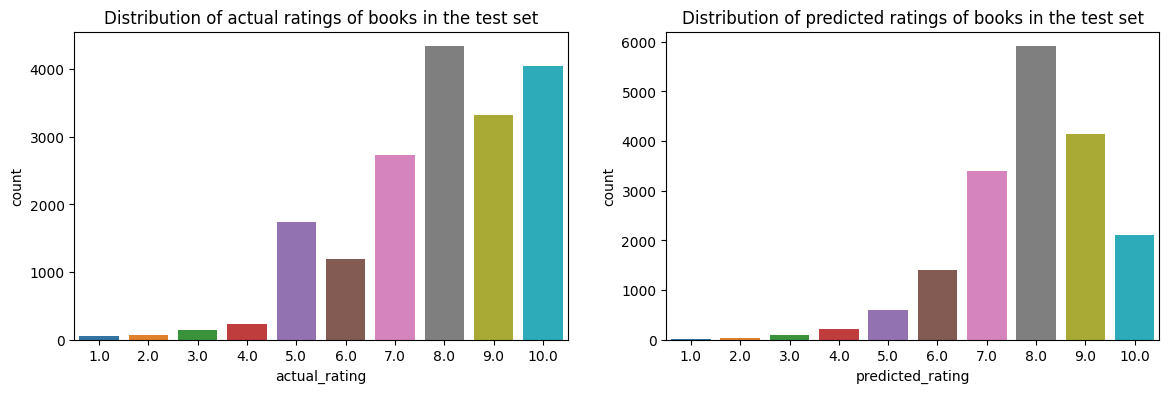

In [128]:
# Visualizing evaluation Metric Score chart
#Distribution of Actual and Predicted  ratings in the test set
actual_predicted()

#### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 -SVD (Singular Value Decomposition)

In [130]:
# ML Model - 2 Implementation
model_svd= SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
print(pd.DataFrame(cv_results_svd).mean())
# Fit the Algorithm
model_svd.fit(trainset)
# Predict on the model
predictions = model_svd.test(testset)

test_rmse    1.515214
test_mae     1.153318
fit_time     0.821215
test_time    0.177213
dtype: float64


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

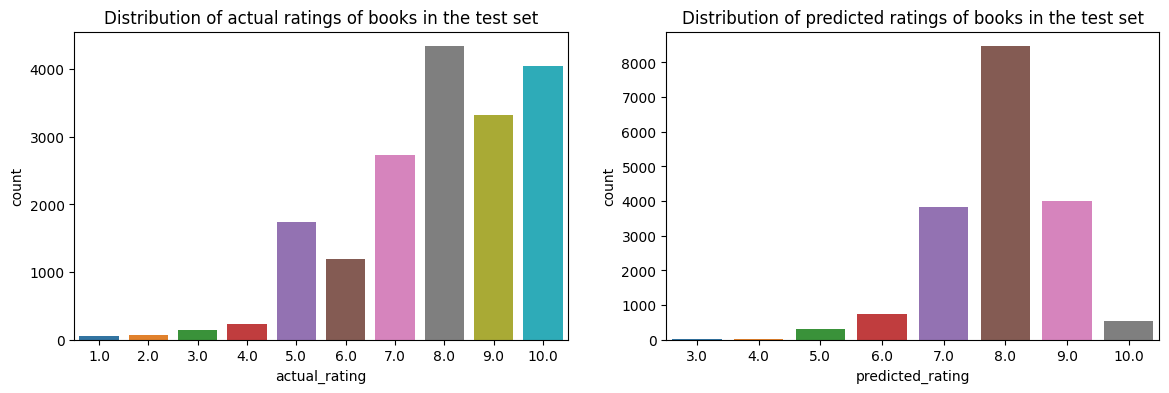

In [131]:
# Visualizing evaluation Metric Score chart
#Distribution of Actual and Predicted  ratings in the test set
actual_predicted()

#### 2. Cross- Validation & Hyperparameter Tuning

In [132]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
# Fit the Algorithm
gs.fit(data)


In [133]:
#Getting the best parameters according to metric 'root mean squared error'
print(gs.best_params['rmse'])

{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [134]:
#Creating model with optimized parameters
model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
#Fit the Algorithm
model.fit(trainset)
# Predict on the model
predictions = model.test(testset)

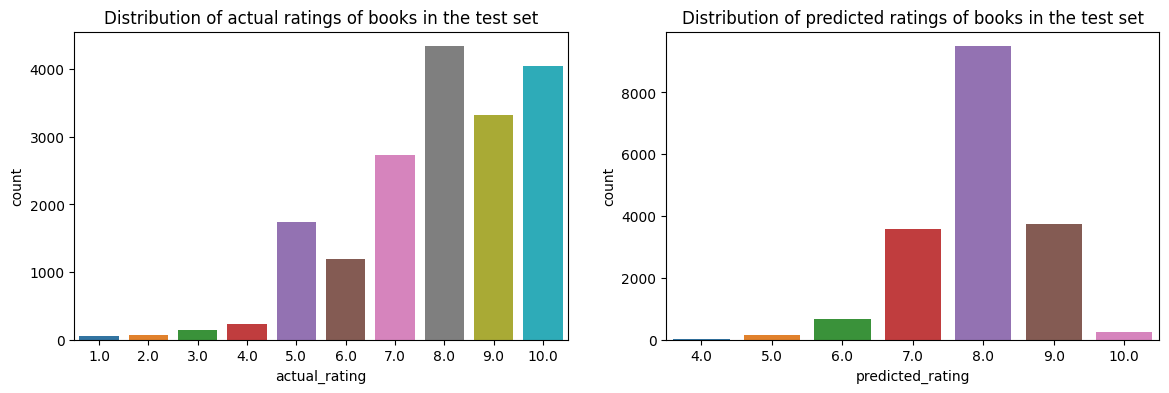

In [135]:
# Visualizing evaluation Metric Score chart
#Distribution of Actual and Predicted  ratings in the test set
actual_predicted()

##### Which hyperparameter optimization technique have you used and why?

Gridsearch CV has been used for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here.

### ML Model - 3 - NMF (Negative Matrix Factorization)

In [136]:
# ML Model - 3 Implementation
model_nmf= NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
print(pd.DataFrame(cv_results_nmf).mean())
# Fit the Algorithm
model_nmf.fit(trainset)
# Predict on the model
predictions = model_nmf.test(testset)

test_rmse    2.665812
test_mae     2.299025
fit_time     1.923418
test_time    0.186945
dtype: float64


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

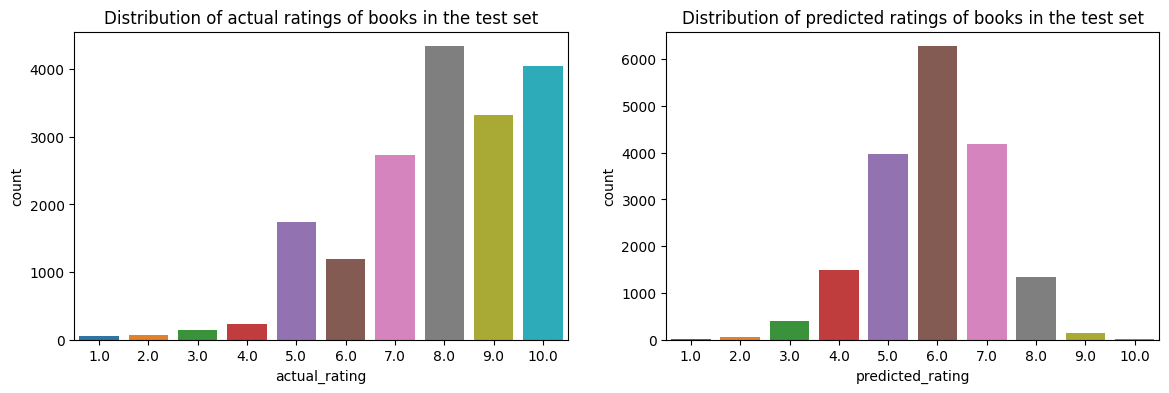

In [137]:
# Visualizing evaluation Metric Score chart
#Distribution of Actual and Predicted  ratings in the test set
actual_predicted()

#### 2. Cross- Validation & Hyperparameter Tuning

In [138]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Root Mean Squared Error(RMSE) is chosen as the evaluation metric

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The model KNNwithMeans is chosen as the final model as it gives the best rmse score than other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### Recommending  Books

In [139]:
#Testing book recommendation for user-id '237577' using KNNWithMeans Model 
book_recommender(model_knn , 237577)

,ISBN,Book-Title,Book-Author,Publisher,year
254249,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,0
39842,0812524829,Slant,Greg Bear,Tor Books,1998
65729,0812524861,Songmaster,Orson Scott Card,Tor Books (Mm),1987
117554,0812530063,Firestar (Firestar),Michael Flynn,Tor Science Fiction,1997
73475,0812530411,"The Blood of Ten Chiefs (Elfquest, Vol 1)",Richard Pini,Tor Books,1986
81902,0812528107,Path of the Eclipse,Chelsea Quinn Yarbro,Tor Books (Mm),1989
2091,0812530314,The Grey Beginning,Barbara Michaels,Tor Books,1992
73055,0812530225,The Stars Are Also Fire,Poul Anderson,Tor Books,1995
73105,0812530055,A College of Magics,Caroline Stevermer,Tor Books (Mm),1995
65064,0812530322,Necroscope 4: Deadspeak,Brian Lumley,Tor Books,1992


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [140]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [141]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Most books have got high ratings of 8 followed by 10 and 7 ratings.
* William Shakespeare has written maximum number of books
* Most books has been published by the Ballantine Books
* USA has the most book readers followed by Canada , United Kingdom , Germany and others.
* The publication of the books has been almost consistently increasing from 1970 onwardsupto 2002
* Most of the book readers are Young adults followed by Middle aged people between age twent to sixty
* Books of Stepen King has been read most.
* The book 'Selected Poems' has been published most by different publishers
* Nearly 63 percent users don't rate books
* The book lovely bones has got the best ratings among books rated by more than fifty users
* The Two Towers (The Lord of the Rings , Part 2) is the best rated book among books rated by minimum of fifty users
* Among the top ten book reading countries newzealand has the lowest average age and spain has the highest average age.
* The model KNNWithMeans gives the best RMSE score and takes the least amount of fitting time among our models KNNWithMeans ,SVD and NMF so we choose it as our model to be used.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***